# **Malaria Detection**

##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>

> Malaria is a life-threatening disease caused by parasites that are transmitted to people through the bites of infected mosquitoes. It remains a major public health issue, particularly in tropical and subtropical regions. Rapid and accurate diagnosis is crucial for effective treatment and management of malaria. Traditional diagnostic methods, such as microscopic examination of blood smears, are labor-intensive and require significant expertise. By leveraging deep learning, we can automate the detection process, potentially reducing the diagnostic workload on healthcare professionals and improving the accuracy and speed of malaria diagnosis.

**The objectives:** What is the intended goal?<br>

>The primary goal of this project is to develop a deep learning model capable of accurately distinguishing between parasitized and uninfected blood cell images. The intended outcome is a robust and reliable automated diagnostic tool that can assist healthcare professionals in diagnosing malaria, thereby improving patient outcomes and aiding in the fight against this disease.

**The key questions:** What are the key questions that need to be answered?<br>

>Model Performance: How accurately can the a model distinguish between parasitized and uninfected cells?
>Generalization: How well does the model perform on unseen data (test dataset)?
>Efficiency: How efficient is the model in terms of processing time and resource usage?

**The problem formulation:** What is it that we are trying to solve using data science?

>The aim is to solve the problem of automated malaria diagnosis using data science and deep learning techniques. Specifically, seeking to:

- Data Preparation: Utilize a dataset of labeled images of blood cells, categorized into arasitized and uninfected.
- Model Development: Develop a convolutional neural network (CNN) to learn and distinguish between features of parasitized and uninfected cells.
- Training and Validation: Train the model on a subset of the data and validate its performance on a separate validation set to fine-tune hyperparameters and prevent overfitting.
- Testing: Evaluate the model on a test dataset to determine its accuracy and overall robustness.

> In summary, this project addresses a critical need for automated, accurate, and efficient malaria diagnosis. Using deep learning techniques, the goal is to build a model that can reliably distinguish between parasitized and uninfected cells, thereby supporting healthcare professionals in their diagnostic efforts and contributing to the overall goal of reducing the burden of malaria worldwide. The project will involve data preparation, various model development, training, validation, testing and deciding the best solution.
## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


### <b>Loading libraries</b>

In [251]:
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt


### <b>Let us load the data</b>

The extracted folder has different folders for train and test data will contain the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [252]:
# Function to load and process images
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(label)
    return images, labels

# Define the path to TRAIN dataset
data_path_train = 'cell_images/train'

# Define image size and initialize arrays
img_size = (128, 128)
categories = ['uninfected', 'parasitized']
label_map = { 'uninfected': 0, 'parasitized': 1 }

# Load images and labels
all_images = []
all_labels = []

for category in categories:
    folder_path = os.path.join(data_path_train, category)
    label = label_map[category]
    images, labels = load_images_from_folder(folder_path, label)
    all_images.extend(images)
    all_labels.extend(labels)

# Convert lists to numpy arrays and normalize pixel values
X_train = np.array(all_images, dtype='float32') / 255
y_train = np.array(all_labels)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)

# Save the processed data for later use
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)

#Define the path to TEST dataset
data_path_test = 'cell_images/test'

# Load images and labels for test data
all_images = []
all_labels = []

for category in categories:
    folder_path = os.path.join(data_path_test, category)
    label = label_map[category]
    images, labels = load_images_from_folder(folder_path, label)
    all_images.extend(images)
    all_labels.extend(labels)

# Convert lists to numpy arrays and normalize pixel values
X_test = np.array(all_images, dtype='float32') / 255
y_test = np.array(all_labels)

# Convert labels to one-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

# Save the processed data for later use
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

###<b> Check the shape of train and test images

In [253]:
# Checking the shape of the dataset
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")


Shape of X_train: (24958, 128, 128, 3)
Shape of X_test: (2600, 128, 128, 3)


###<b> Check the shape of train and test labels

In [254]:
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of y_train: (24958, 2)
Shape of y_test: (2600, 2)


####<b> Observations and insights: _____

On the train data we have the fallowing observations.
>Image shape has:
24958 training images.
Each image is resized to 128x128 pixels.
Each image has 3 color channels (RGB).

>Labes shape has:
24958 training labels.
Each label encoded with 2 classes (0 for uninfected and 1 for parasitized).


On the test data we have the fallowing observations.
>Image shape has:
2600 training images.
Each image is resized to 128x128 pixels.
Each image has 3 color channels (RGB).

>Labes shape has:
2600 training labels.
Each label encoded with 2 classes (0 for uninfected and 1 for parasitized).

### <b>Check the minimum and maximum range of pixel values for train and test images

In [255]:
# Check the minimum and maximum pixel values for train images
min_pixel_train = np.min(X_train)
max_pixel_train = np.max(X_train)

# Check the minimum and maximum pixel values for test images
min_pixel_test = np.min(X_test)
max_pixel_test = np.max(X_test)

print(f"Minimum pixel value in train images: {min_pixel_train}")
print(f"Maximum pixel value in train images: {max_pixel_train}")
print(f"Minimum pixel value in test images: {min_pixel_test}")
print(f"Maximum pixel value in test images: {max_pixel_test}")

Minimum pixel value in train images: 0.0
Maximum pixel value in train images: 1.0
Minimum pixel value in test images: 0.0
Maximum pixel value in test images: 1.0


####<b> Observations and insights: _____

Normalization was successful.

The pixel values in train and test images have been successfully normalized to the range [0, 1].

The minimum value of 0.0 represents the darkest pixels (black).

The maximum value of 1.0 represents the brightest pixels (white).


Having both the minimum and maximum values as 0.0 and 1.0 respectively indicates that there are no anomalies or unexpected values in the dataset.


###<b> Count the number of values in both uninfected and parasitized 

In [256]:

# Function to count images in a folder
def count_images_in_folder(folder):
    return len([filename for filename in os.listdir(folder) if os.path.isfile(os.path.join(folder, filename))])

# Count images in training data
train_counts = {category: count_images_in_folder(os.path.join(data_path_train, category)) for category in categories}

# Count images in test data
test_counts = {category: count_images_in_folder(os.path.join(data_path_test, category)) for category in categories}

# Print the counts
print("Training Data Counts:")
for category, count in train_counts.items():
    print(f"{category.capitalize()}: {count} images")

print("\nTest Data Counts:")
for category, count in test_counts.items():
    print(f"{category.capitalize()}: {count} images")

Training Data Counts:
Uninfected: 12376 images
Parasitized: 12582 images

Test Data Counts:
Uninfected: 1300 images
Parasitized: 1300 images


###<b>Normalize the images

In [41]:
#The images has been already normalised when I devided by / 255
#X_test = np.array(all_images, dtype='float32') / 255
#X_train = np.array(all_images, dtype='float32') / 255

####<b> Observations and insights: _____</b>

The categories has the same amount of images on both of Training and Test dataset.

<b>However:</b>

12376(train)+1300(test)= 13676 (total). 

1300 ÷ 13676 = 0.095057034220532 = 9.5057034220532% test data.

The ratio is aproximatively <b>90.5:9.5</b> . The optimal ratio would be 80:20 to prevent overfitting. I will continue with this ratio and change if necessary.


###<b> Plot to check if the data is balanced

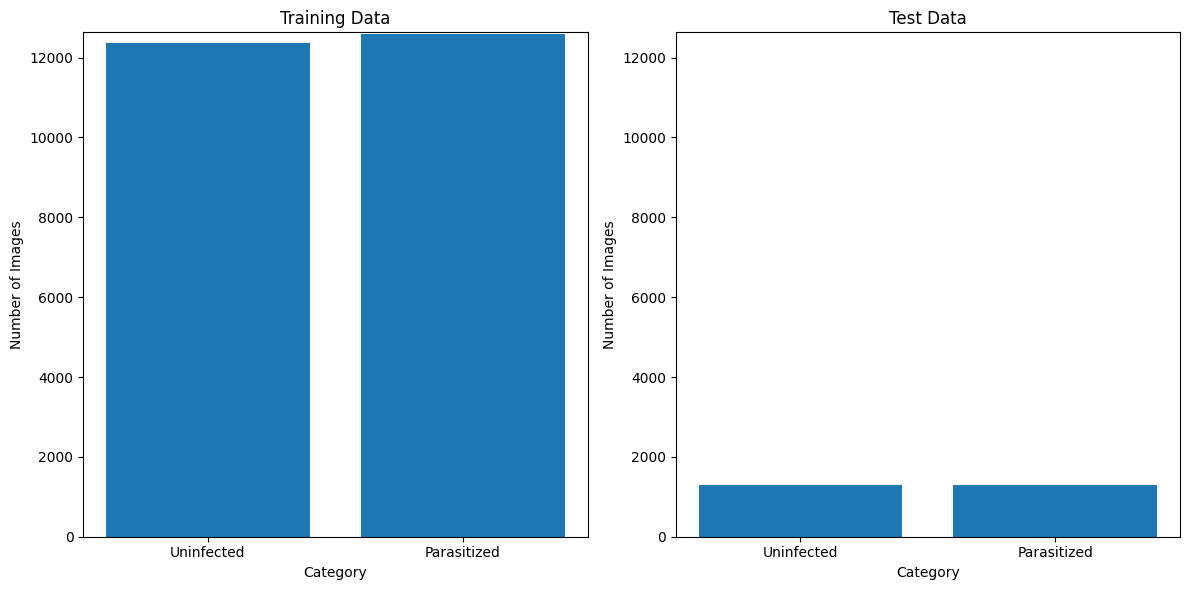

In [257]:
# Load the saved labels
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

# Count the number of images in each category
train_counts = np.sum(y_train, axis=0)
test_counts = np.sum(y_test, axis=0)

categories = ['Uninfected', 'Parasitized']

# Plotting the data balance
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Training data plot
ax[0].bar(categories, train_counts)
ax[0].set_title('Training Data')
ax[0].set_xlabel('Category')
ax[0].set_ylabel('Number of Images')
ax[0].set_ylim([0, max(max(train_counts), max(test_counts)) + 50])  # Adjust y-axis limit

# Test data plot
ax[1].bar(categories, test_counts)
ax[1].set_title('Test Data')
ax[1].set_xlabel('Category')
ax[1].set_ylabel('Number of Images')
ax[1].set_ylim([0, max(max(train_counts), max(test_counts)) + 50])  # Adjust y-axis limit

plt.tight_layout()
plt.show()

####<b> Observations and insights: _____

Ploting the data shows that both classes have a similar number of images in both training and test datasets, then the dataset is balanced, even though the distribution is aproximatively 90:10.

### <b>Data Exploration</b>
Let's visualize the images from the train data

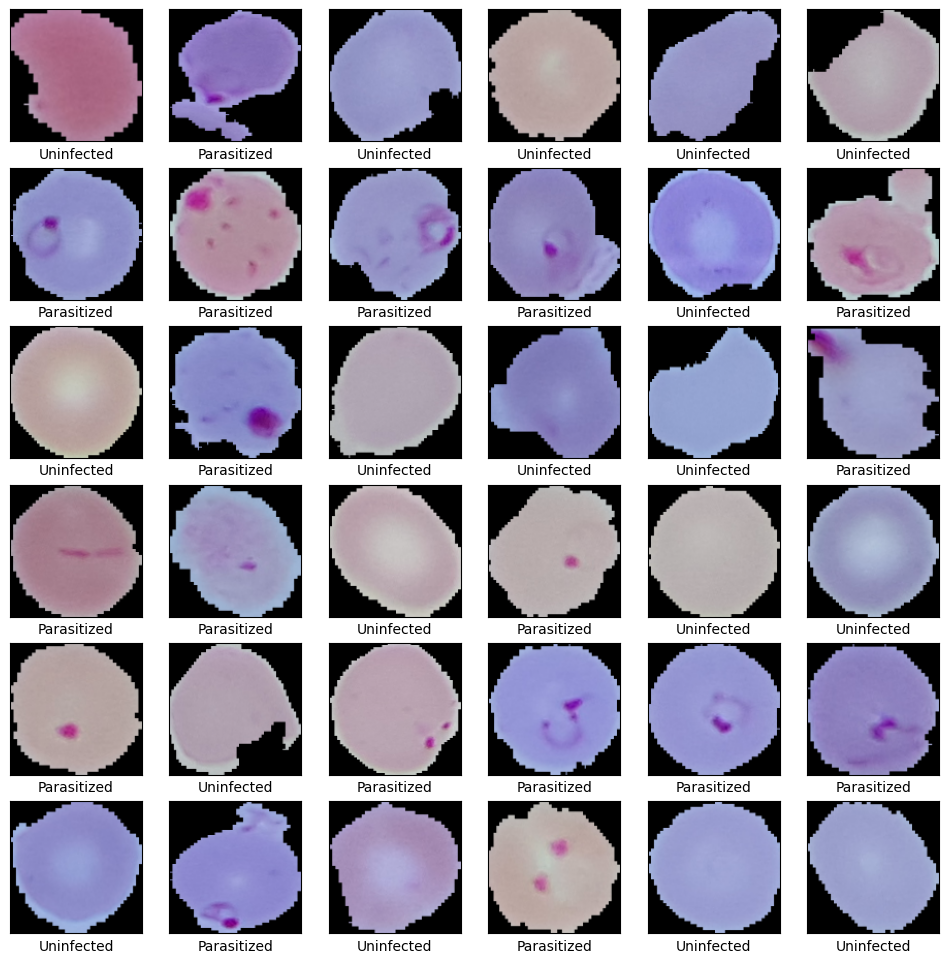

In [258]:
#Modified as per the recomandatin bellow "Visualize the images with subplot(6, 6) and figsize = (12, 12)"
# Function to plot images from both categories
def plot_images_from_both_categories(images, labels, categories, num_images_per_category=18):
    plt.figure(figsize=(12, 12)) #sets the figure size to 12x12 inches
    
    # Find indices of each category
    uninfected_indices = np.where(labels[:, 0] == 1)[0]
    parasitized_indices = np.where(labels[:, 1] == 1)[0]
    
    # Randomly select images from each category
    selected_uninfected_indices = np.random.choice(uninfected_indices, num_images_per_category, replace=False)
    selected_parasitized_indices = np.random.choice(parasitized_indices, num_images_per_category, replace=False)
    
    selected_indices = np.concatenate([selected_uninfected_indices, selected_parasitized_indices])
    np.random.shuffle(selected_indices)
    
    for i, idx in enumerate(selected_indices):
        plt.subplot(6, 6, i+1)#sets up a 6x6 grid for the images.
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[idx], cmap=plt.cm.binary)
        label_index = np.argmax(labels[idx])
        plt.xlabel(categories[label_index])
    plt.show()

# Plot images
plot_images_from_both_categories(X_train, y_train, categories, num_images_per_category=18)#num_images_per_category is set to 18 to display a total of 36 images (18 from each category).

####<b> Observations and insights: _____</b>

<b>Disclamer</b>
>While trying to load the images in a simple way, I observed that only the first category was showing. I modified to randomply select images from both categories for showing  the Parasitized category as well. Then I choose to add also the step bellow. 

###<b> Visualize the images with subplot(6, 6) and figsize = (12, 12)

In [ ]:

#Already modified in the previous step 


####<b>Observations and insights:

>Images are verified and they are correctly labeled and processed. However for 3 of the Uninfected I can spot some small difference, although is not being categorised as Parasitized might create dificulty in the training process. I'll keep an eye on it.


###<b> Plotting the mean images for parasitized and uninfected

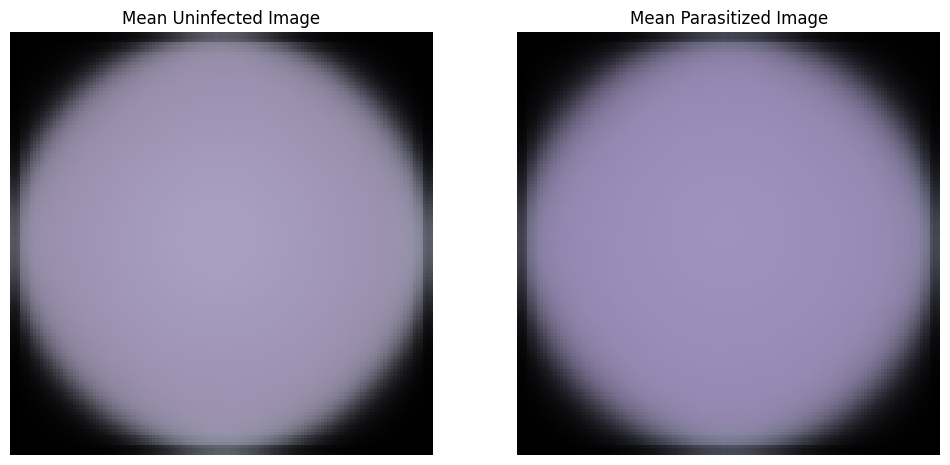

In [260]:
# Calculate the mean pixel values for each category and then visualize these mean images.

# Separate the images by category
uninfected_images = X_train[np.where(y_train[:, 0] == 1)]
parasitized_images = X_train[np.where(y_train[:, 1] == 1)]

# Calculate the mean image for each category
mean_uninfected = np.mean(uninfected_images, axis=0)
mean_parasitized = np.mean(parasitized_images, axis=0)

# Plot the mean images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(mean_uninfected, cmap='jet')# Tring to use viridis color map but it was not showing the diference very well. jet seems better fitting.
ax[0].set_title('Mean Uninfected Image')
ax[0].axis('off')

ax[1].imshow(mean_parasitized, cmap='jet')
ax[1].set_title('Mean Parasitized Image')
ax[1].axis('off')

plt.show()

<b> Mean image for parasitized

In [ ]:
#Showed them side by side for better interpretation 

<b> Mean image for uninfected

In [ ]:
#Showed them side by side for better interpretation 

####<b> Observations and insights: _____</b>

Even though I played with all sorts of color maps(jet, hot, rainbow, bone, veridis, gray), it seems that categories are slightly different, with Parasitized having a darker uniform color, while Uninfected has a brighter middle.


### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

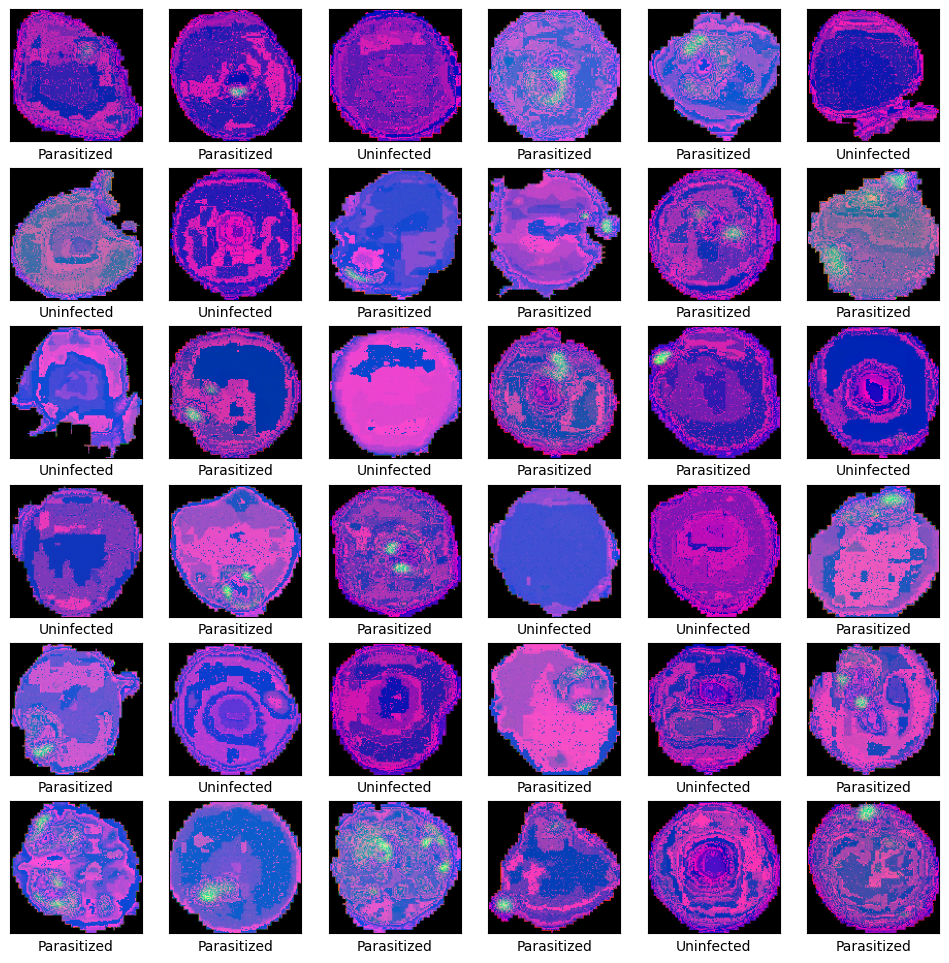

In [261]:
# Function to convert RGB to HSV
def convert_to_hsv(images):
    hsv_images = []
    for img in images:
        hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        hsv_images.append(hsv_img)
    return np.array(hsv_images)

# Convert the training images to HSV
X_train_hsv = convert_to_hsv(X_train)

# Clip the values to ensure they are within [0, 255] range
X_train_hsv=(X_train_hsv * 255).astype(np.uint8)#By inverting the normalization I was able to plot the original images. Otherwize the images were showing only red and black making hard to understand.

# Define categories
categories = ['Uninfected', 'Parasitized']

# Function to plot images
def plot_images(images, labels, categories, num_images=16):
    plt.figure(figsize=(12, 12))
    indices = np.random.choice(len(images), num_images, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(6, 6, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[idx])
        label_index = np.argmax(labels[idx])
        plt.xlabel(categories[label_index])
    plt.show()

# Plot HSV images
plot_images(X_train_hsv, y_train, categories, num_images=36)

###<b> Converting the test data

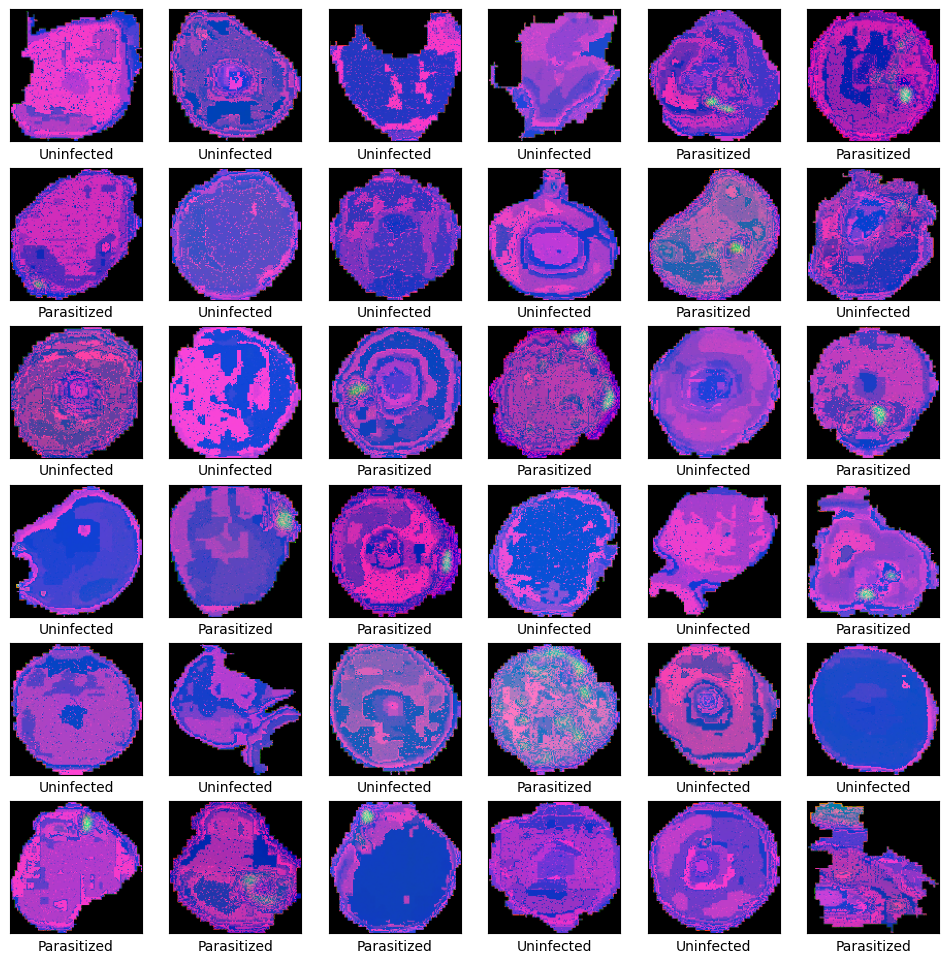

In [262]:
# Convert the test images to HSV
X_test_hsv = convert_to_hsv(X_test)
# Clip the values to ensure they are within [0, 255] range
X_test_hsv=(X_test_hsv * 255).astype(np.uint8)

# Plot HSV test images
plot_images(X_test_hsv, y_test, categories, num_images=36)

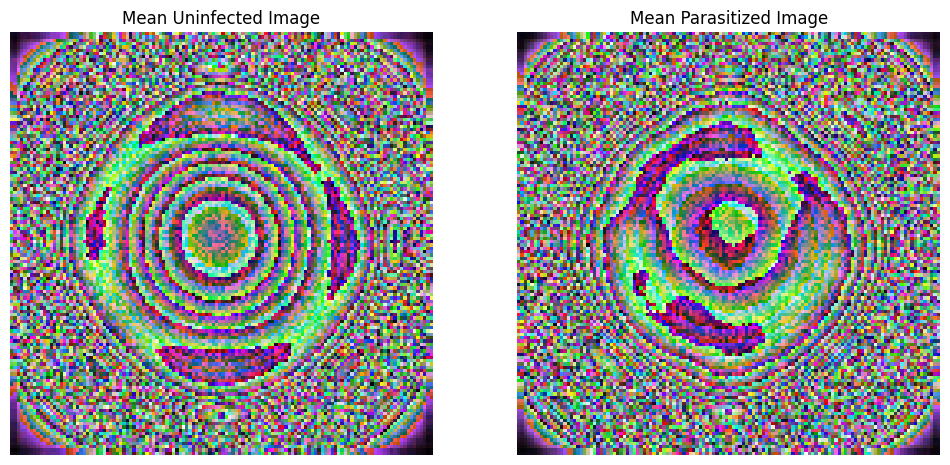

In [263]:
#In addition I'm plotting also the converted mean image of both categories, for a better understanding of the data.
# Separate the images by category
uninfected_images = X_train_hsv[np.where(y_train[:, 0] == 1)]
parasitized_images = X_train_hsv[np.where(y_train[:, 1] == 1)]

# Calculate the mean image for each category
mean_uninfected = np.mean(uninfected_images, axis=0)
mean_parasitized = np.mean(parasitized_images, axis=0)

# Clip the values to ensure they are within [0, 255] range
X_test_hsv
mean_uninfected = (mean_uninfected * 255).astype(np.uint8)
mean_parasitized =(mean_parasitized * 255).astype(np.uint8)


# Plot the mean images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(mean_uninfected, cmap='jet')# Tring to use viridis color map but it was not showing the diference very well. jet seems better fitting.
ax[0].set_title('Mean Uninfected Image')
ax[0].axis('off')

ax[1].imshow(mean_parasitized, cmap='jet')
ax[1].set_title('Mean Parasitized Image')
ax[1].axis('off')

plt.show()

####<b>Observations and insights: _____</b>

>HSV stands for Hue, Saturation, and Value, which separates color information (Hue) from intensity (Value).

>Initially, the images appeared in only red and black due to improper normalization.
This was corrected by scaling the HSV values by 255 and converting them to uint8, effectively inverting the normalization.

>Parasitized Images: These images predominantly exhibited green pixels.
In the HSV color space, green hues indicate specific ranges of the hue channel.
This suggests that the presence of parasites in the cells might correspond to certain color characteristics in the hue channel.

>Uninfected Images: These images appeared to have a range of colors primarily in the purple spectrum.
The hue values in the purple range suggest a different staining pattern or natural coloration in uninfected cells.
This distinction in color can be a critical feature for differentiating between infected and uninfected cells.

>From the mean it shows that Uninfected has a uniform round circle shape pixel, while Parasitized has an uneven core.

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

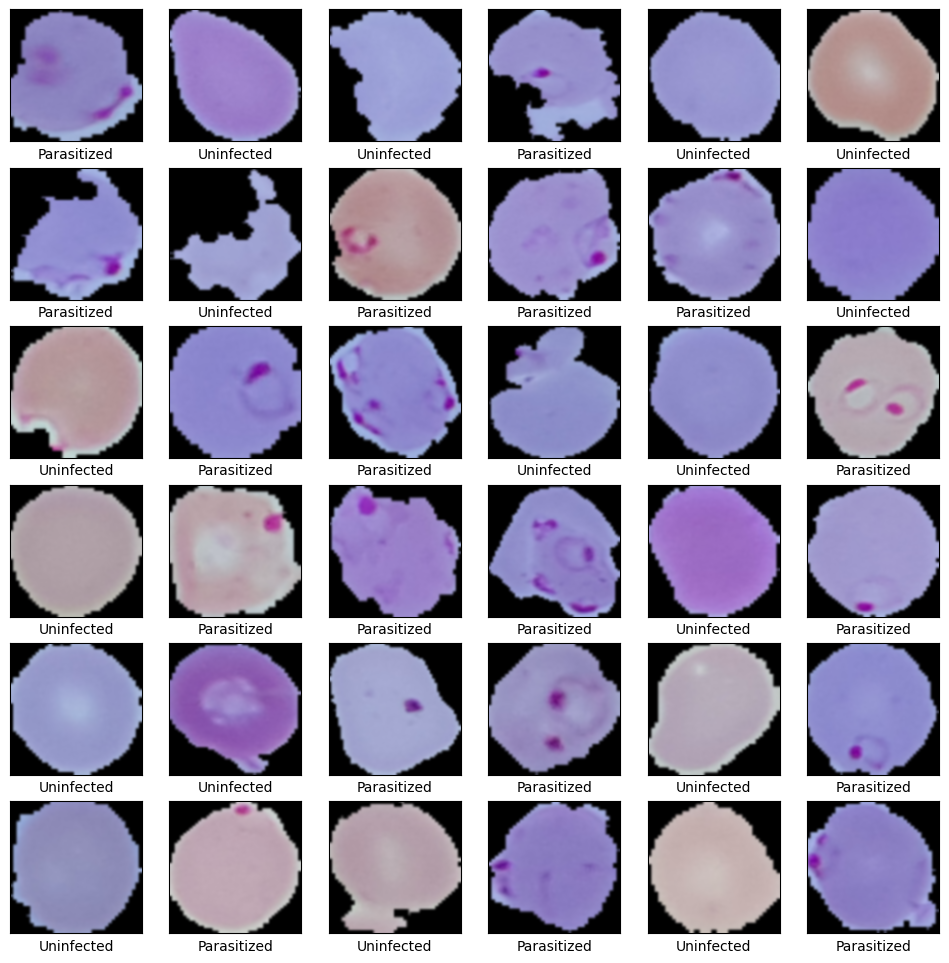

In [264]:
# Function to apply Gaussian Blurring to images
def apply_gaussian_blur(images, kernel_size=(5, 5), sigma=0):
    blurred_images = []
    for img in images:
        blurred_img = cv2.GaussianBlur(img, kernel_size, sigma)
        blurred_images.append(blurred_img)
    return np.array(blurred_images)

# Apply Gaussian Blurring to the training images
X_train_blurred = apply_gaussian_blur(X_train)

# Define categories
categories = ['Uninfected', 'Parasitized']
# Plot blurred images
plot_images(X_train_blurred, y_train, categories, num_images=36)

# Save the blurred images for future use
np.save('X_train_blurred.npy', X_train_blurred)

###<b> Gaussian Blurring on test data

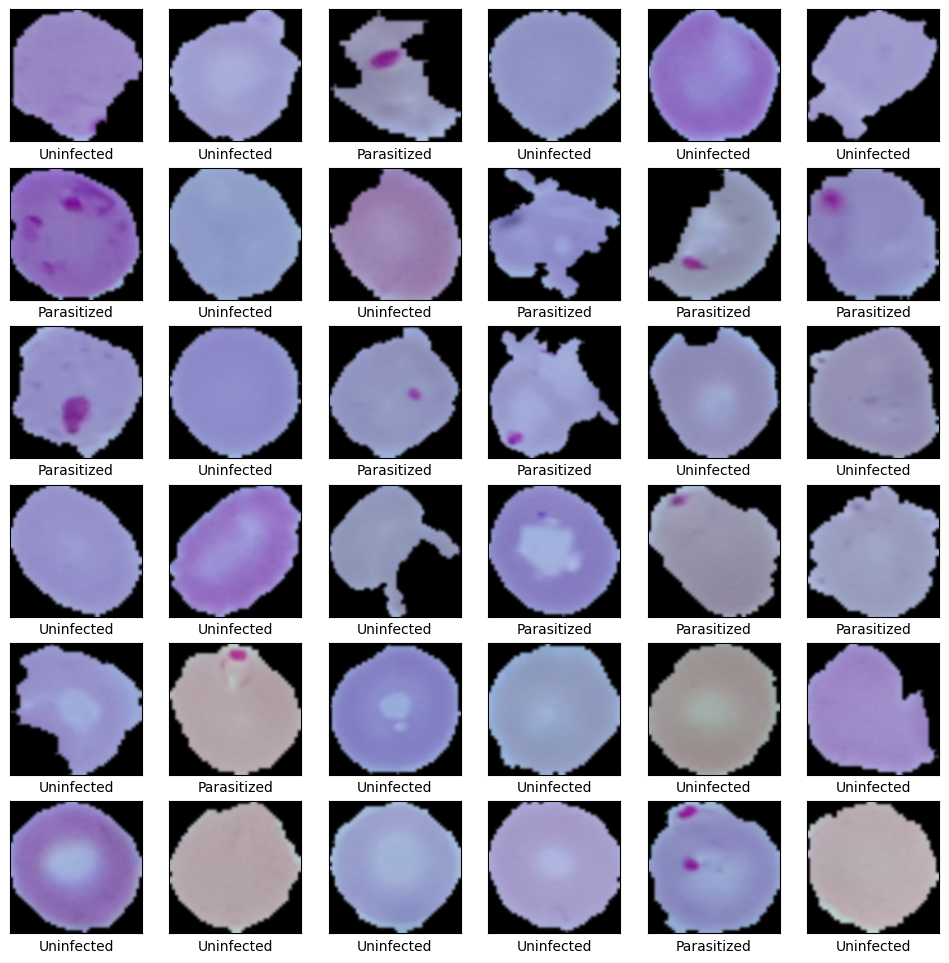

In [265]:
# Apply Gaussian Blurring to the training images
X_test_blurred = apply_gaussian_blur(X_test)
# Plot blurred images
plot_images(X_test_blurred, y_test, categories, num_images=36)

# Save the blurred images for future use
np.save('X_test_blurred.npy', X_test_blurred)

####**Observations and insights: _____**

**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?

> Blurring idn't significantly change the data for the use case purpose. Images are even worse to be distingushed. 

> In addition there are few things that may improve data for ML model.

1. <b>Data Augmentation</b> involves creating new training samples by applying various transformations to the existing images. This can help make the model more robust by increasing the diversity of the training data.
Transformations:
- Rotation
- Flipping
- Zooming
- Brightness Adjustment
- Noise Addition.

2. <b>Edge Detection</b> can help highlight important structures within the images, which may be useful the use case purpose.

3. <b>Histogram Equalization</b> can improve the contrast of images, making features more distinguishable.


Train images:


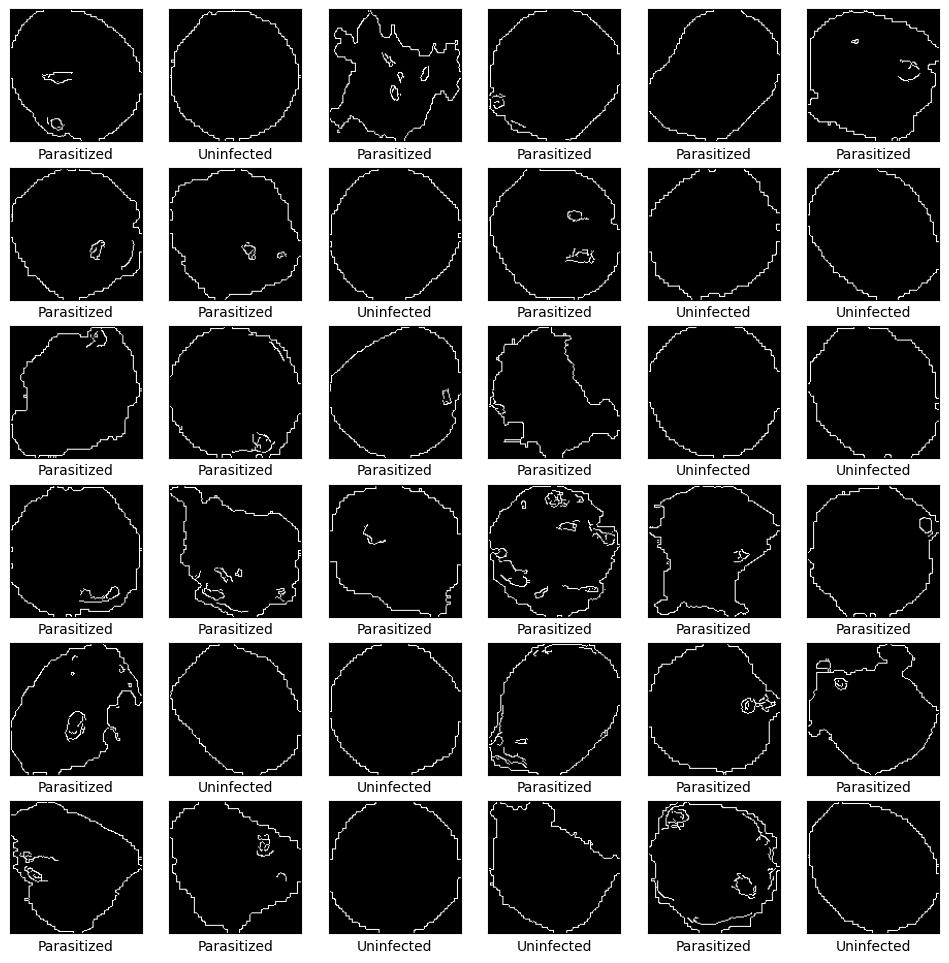

Test images:


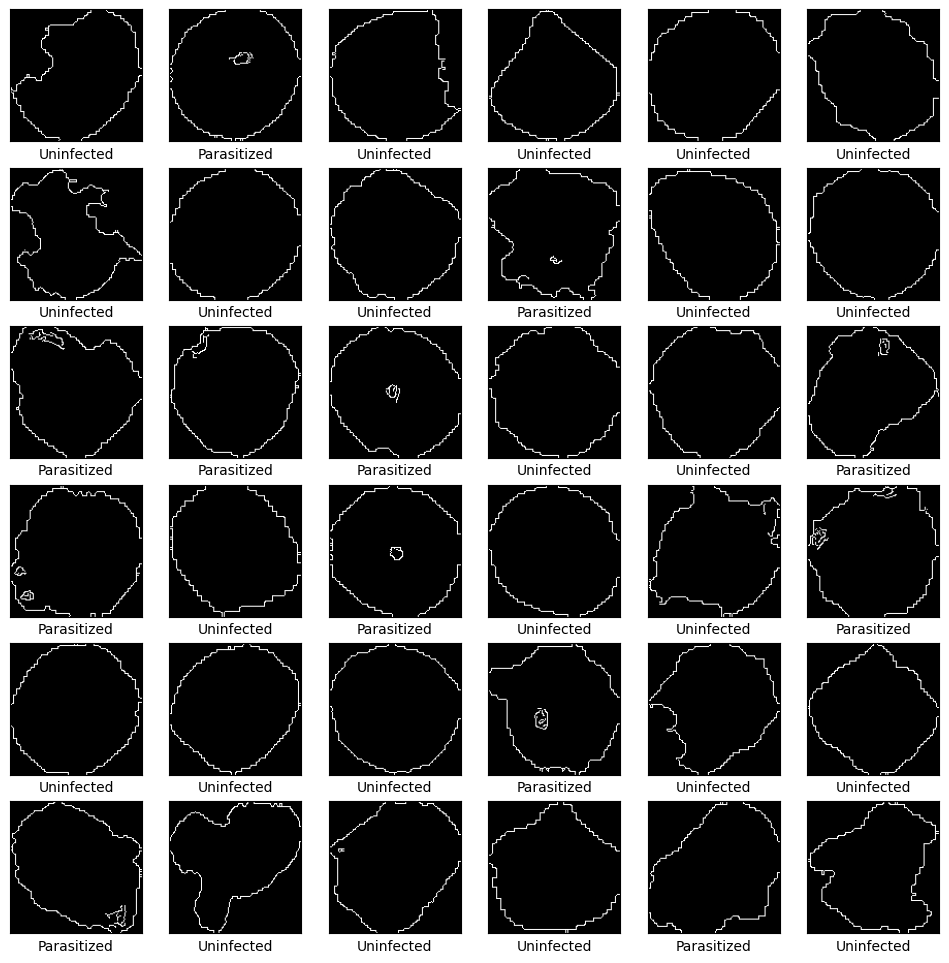

In [266]:
#Appliyng Edge Detection
# Function to apply Canny edge detection to images
def apply_canny_edge(images, low_threshold=50, high_threshold=150):
    edge_images = []
    for img in images:
        # Ensure the image is in 8-bit unsigned integer format
        if img.dtype != np.uint8:
            img = (img * 255).astype(np.uint8)
        # Convert the image to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        # Apply Canny edge detection
        edge_img = cv2.Canny(gray_img, low_threshold, high_threshold)
        # Convert single-channel edge image to 3-channel format for consistent visualization
        edge_img = cv2.cvtColor(edge_img, cv2.COLOR_GRAY2RGB)
        edge_images.append(edge_img)
    return np.array(edge_images)

# Apply Canny edge detection to the training and test images
X_train_edges = apply_canny_edge(X_train)
X_test_edges = apply_canny_edge(X_test)

# Plot edge-detected images
print('Train images:')
plot_images(X_train_edges, y_train, categories, num_images=36)
print('Test images:')
plot_images(X_test_edges, y_test, categories, num_images=36)



<b>Observation</b>

 >Edge Detection is suitable for this use case as it shows the shape of the parasite inside the cell. Also using grayscale is easy to process making the model more optimal.

## **Model Building**

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [267]:
from tensorflow.keras.model import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import os



####<B>One Hot Encoding the train and test labels

In [112]:
#I choose for the first model to use transformed HSV images. Already normalised.
#X_train_hsv
#y_train
#X_test_hsv
#y_test



###<b> Building the model

In [268]:
# Define the CNN architecture
model1 = Sequential([
    Input(shape=(X_train_hsv.shape[1], X_train_hsv.shape[2], X_train_hsv.shape[3])),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 classes: Uninfected and Parasitized
])

###<b> Compiling the model

In [269]:
# Compile the model
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model1.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

<b> Using Callbacks 

In [270]:
# Define callbacks
callbacks = [
    ModelCheckpoint(filepath='hsv_model_1.keras', monitor='val_loss', save_best_only=True),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    TensorBoard(log_dir=os.path.join("logs", "fit", "cnn_model"), histogram_freq=1)
]



<b> Fit and train our Model

In [272]:
# Train the model
history1 = model1.fit(X_train_hsv, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test_hsv, y_test))

Epoch 1/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.6226 - loss: 0.6465 - val_accuracy: 0.5665 - val_loss: 0.6855
Epoch 2/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.6491 - loss: 0.6270 - val_accuracy: 0.5923 - val_loss: 0.6735
Epoch 3/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.6696 - loss: 0.6073 - val_accuracy: 0.6081 - val_loss: 0.6728
Epoch 4/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 77s 99ms/step - accuracy: 0.6861 - loss: 0.5841 - val_accuracy: 0.6035 - val_loss: 0.6843
Epoch 5/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 77s 99ms/step - accuracy: 0.7018 - loss: 0.5645 - val_accuracy: 0.5854 - val_loss: 0.7657
Epoch 6/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.7102 - loss: 0.5405 - val_accuracy: 0.6077 - val_loss: 0.7278
Epoch 7/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 76s 98ms/step - accuracy: 0.7376 - loss: 0.5125 - val_accuracy: 0.6054 - val_loss: 0.7539
Epoch 8/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 77s 98ms/step - accuracy: 0.7535 - loss: 0.4871

###<b> Evaluating the model on test data

In [273]:
# Evaluate the model on the test data
test_loss, test_acc = model1.evaluate(X_test_hsv, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Save the final model
model1.save('hvs_malaria_cnn_model_1.keras')

82/82 - 2s - 26ms/step - accuracy: 0.6019 - loss: 1.4162
Test accuracy: 0.6019230484962463


<b> Plotting the confusion matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step


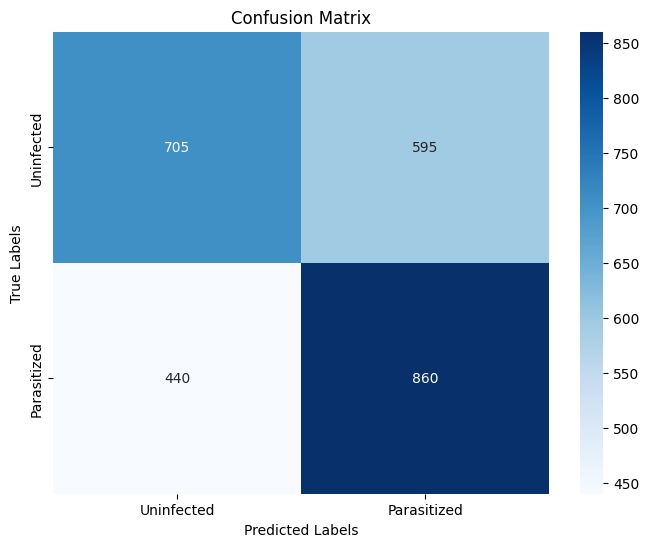

In [274]:
# Generate predictions for the test data
y_pred_prob = model1.predict(X_test_hsv)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



<b>Plotting the train and validation curves

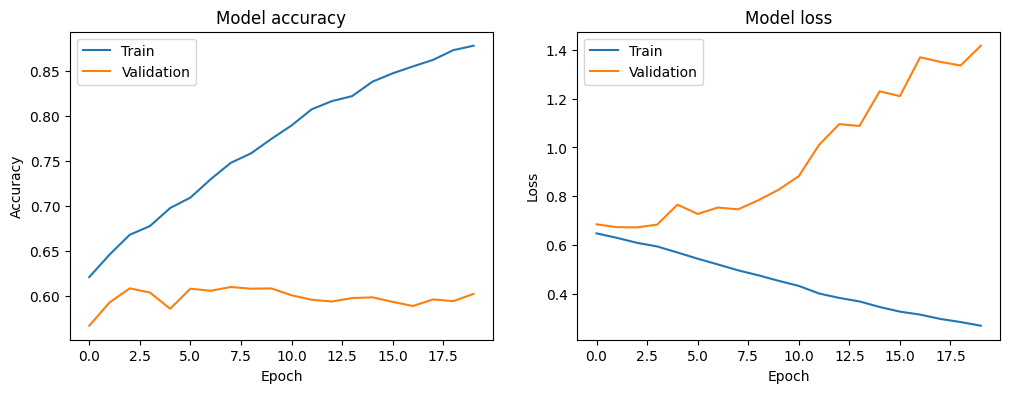

In [275]:
# Plot training and validation curves
def plot_training_curves(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    plt.show()

# Plot the curves
plot_training_curves(history1)

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [277]:
#The model is overfitting.
#Adding L2 regularization (kernel_regularizer=l2(0.001)) to each Conv2D and Dense layer
#to penalize large weights and reduce overfitting.
#Increase the dropout rate to 0.5 to further reduce the risk of overfitting by randomly 
# dropping more units during training.

from tensorflow.keras.regularizers import l2

###<b> Building the Model

In [278]:
# Define the CNN architecture with regularization and increased dropout
model1_improved = Sequential([
    Input(shape=(X_train_hsv.shape[1], X_train_hsv.shape[2], X_train_hsv.shape[3])),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 classes: Uninfected and Parasitized
])


###<b> Compiling the model

In [279]:
# Compile the model
model1_improved.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model1_improved.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_63 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_65 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_65 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

<b> Using Callbacks

In [280]:
# Define callbacks
callbacks = [
    ModelCheckpoint(filepath='hsv_model1_improved.keras', monitor='val_loss', save_best_only=True),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    TensorBoard(log_dir=os.path.join("logs", "fit", "cnn_model"), histogram_freq=1)
]



<b>Fit and Train the model

In [281]:
# Train the model
history_model1_improved = model1_improved.fit(X_train_hsv, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test_hsv, y_test),
                    callbacks=callbacks)

Epoch 1/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 79s 100ms/step - accuracy: 0.7301 - loss: 9.9062 - val_accuracy: 0.9335 - val_loss: 0.4330
Epoch 2/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 77s 99ms/step - accuracy: 0.9609 - loss: 0.3916 - val_accuracy: 0.9742 - val_loss: 0.3121
Epoch 3/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 75s 97ms/step - accuracy: 0.9715 - loss: 0.3127 - val_accuracy: 0.9808 - val_loss: 0.2850
Epoch 4/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 77s 99ms/step - accuracy: 0.9740 - loss: 0.2872 - val_accuracy: 0.9800 - val_loss: 0.2644
Epoch 5/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 77s 99ms/step - accuracy: 0.9759 - loss: 0.2552 - val_accuracy: 0.9808 - val_loss: 0.2157
Epoch 6/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 0.9766 - loss: 0.2145 - val_accuracy: 0.9715 - val_loss: 0.2160
Epoch 7/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 77s 99ms/step - accuracy: 0.9763 - loss: 0.1903 - val_accuracy: 0.9838 - val_loss: 0.1625
Epoch 8/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.9793 - loss: 0.1653 

###<b> Evaluating the model

In [282]:
# Evaluate the model on the test data
test_loss, test_acc = model1_improved.evaluate(X_test_hsv, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Save the final model
model1_improved.save('hvs_malaria_cnn_model_1_improved.keras')

82/82 - 2s - 28ms/step - accuracy: 0.9842 - loss: 0.0871
Test accuracy: 0.9842307567596436


<b> Plotting the confusion matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step


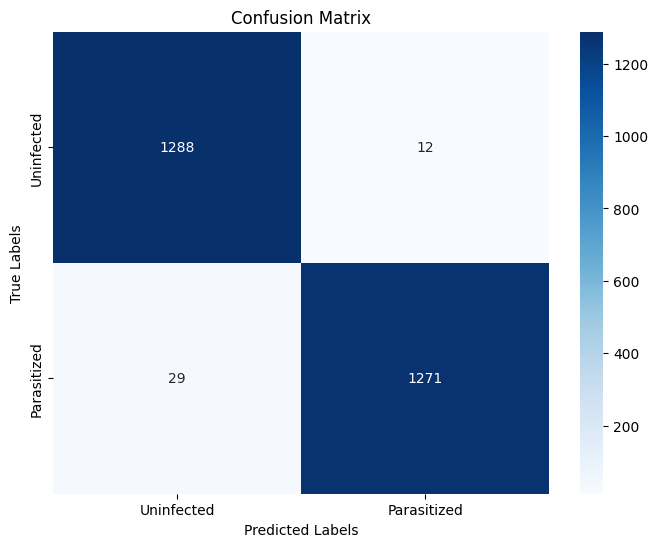

              precision    recall  f1-score   support

  Uninfected       0.98      0.99      0.98      1300
 Parasitized       0.99      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



In [283]:
# Generate predictions for the test data
y_pred_prob = model1_improved.predict(X_test_hsv)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=['Uninfected', 'Parasitized']))

<b> Plotting the train and the validation curves

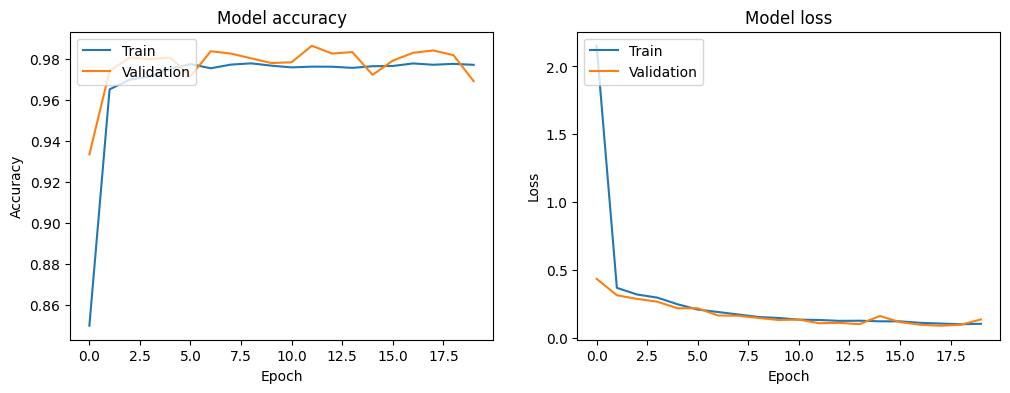

In [284]:
# Plot the curves
plot_training_curves(history_model1_improved)

<b>Observations</b>

> The updated model demonstrates significant improvement with high and stable accuracy for both training and validation sets. This suggests that the model is a good fit for the data, showing excellent generalization and robustness.

###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [285]:
# Loading libraries 
from tensorflow.keras.layers import BatchNormalization, LeakyReLU


###<b> Building the Model

In [286]:
# Define the CNN architecture with BatchNormalization and LeakyReLU
model2 = Sequential([
    Input(shape=(X_train_hsv.shape[1], X_train_hsv.shape[2], X_train_hsv.shape[3])),
    Conv2D(32, (3, 3)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.1),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.1),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.1),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.1),
    Dropout(0.5),
    
    Dense(2, activation='softmax')  # 2 classes: Uninfected and Parasitized
])

###<b>Compiling the model

In [287]:
# Compile the model
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model2.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_66 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_32 (LeakyReLU)      │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_66 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_33 (LeakyReLU)      │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_67 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_34 (LeakyReLU)      │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_68 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_35 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,306 (12.61 MB)

 Trainable params: 3,305,602 (12.61 MB)

 Non-trainable params: 704 (2.75 KB)

<b> Using callbacks

In [288]:
# Define callbacks
callbacks = [
    ModelCheckpoint(filepath='hsv_model_2.keras', monitor='val_loss', save_best_only=True),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    TensorBoard(log_dir=os.path.join("logs", "fit", "cnn_model"), histogram_freq=1)
]

<b>Fit and train the model

In [289]:
# Train the model
history2 = model2.fit(X_train_hsv, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test_hsv, y_test),
                    callbacks=callbacks)

Epoch 1/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 123s 156ms/step - accuracy: 0.7861 - loss: 0.4949 - val_accuracy: 0.9754 - val_loss: 0.1025
Epoch 2/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 120s 153ms/step - accuracy: 0.9612 - loss: 0.1162 - val_accuracy: 0.9792 - val_loss: 0.0785
Epoch 3/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 119s 152ms/step - accuracy: 0.9676 - loss: 0.0956 - val_accuracy: 0.8908 - val_loss: 0.3091
Epoch 4/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 118s 151ms/step - accuracy: 0.9723 - loss: 0.0854 - val_accuracy: 0.8585 - val_loss: 0.3030
Epoch 5/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 118s 151ms/step - accuracy: 0.9744 - loss: 0.0798 - val_accuracy: 0.9812 - val_loss: 0.0630
Epoch 6/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 116s 149ms/step - accuracy: 0.9774 - loss: 0.0707 - val_accuracy: 0.9785 - val_loss: 0.0634
Epoch 7/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 119s 152ms/step - accuracy: 0.9766 - loss: 0.0670 - val_accuracy: 0.9812 - val_loss: 0.0553
Epoch 8/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 117s 150ms/step - accuracy: 0.9789 -

###<b>Evaluating the model

In [290]:
# Evaluate the model on the test data
test_loss, test_acc = model2.evaluate(X_test_hsv, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Save the final model
model2.save('hvs_malaria_cnn_model_2.keras')

82/82 - 3s - 31ms/step - accuracy: 0.9842 - loss: 0.0519
Test accuracy: 0.9842307567596436


<b>Plotting the train and validation accuracy

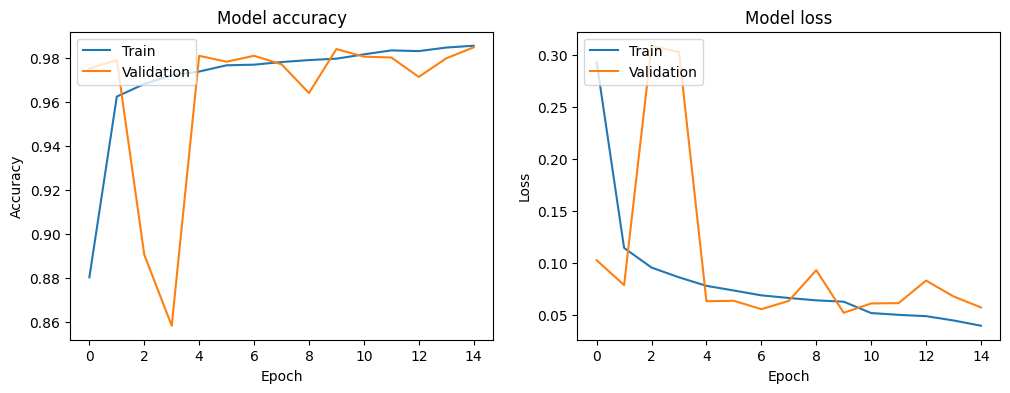

In [291]:
# Plot the curves
plot_training_curves(history2)

####<b>Observations and insights: ____</b>

Is accuring an overfitting after epoch 3. An updated architecture with enhanced regularization and data augmentation is needed for this model to have the best result.
However the previous one had a better result.

<b> Generate the classification report and confusion matrix 

82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step


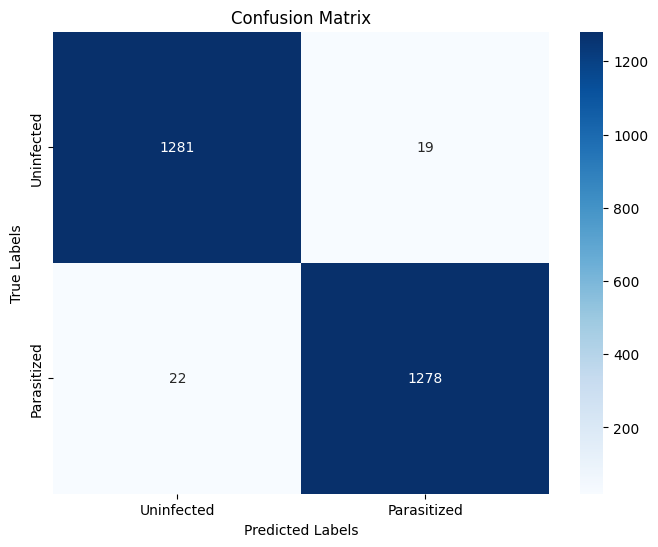

              precision    recall  f1-score   support

  Uninfected       0.98      0.99      0.98      1300
 Parasitized       0.99      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



In [292]:
# Generate predictions for the test data
y_pred_prob = model2.predict(X_test_hsv)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=['Uninfected', 'Parasitized']))

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [296]:
# Loading libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

###<b> Use image data generator

In [300]:
#saving the augumented train dtaset into another parameter. I want to keep X_train_hsv without alteration for future model development.
X_train_hsv_aug = X_train_hsv
X_test_hsv_aug= X_test_hsv
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train_hsv_aug)
datagen.fit(X_test_hsv_aug)

###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

Augumented images for Train


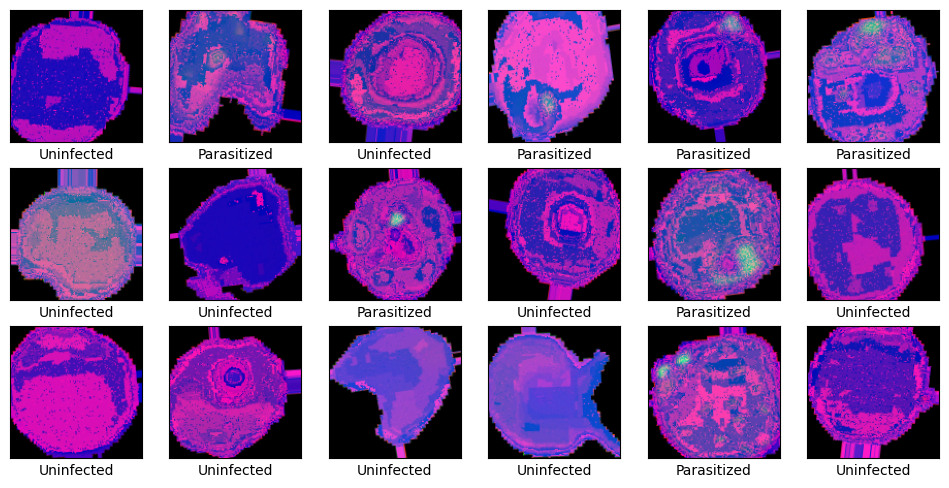

Augumented images for test


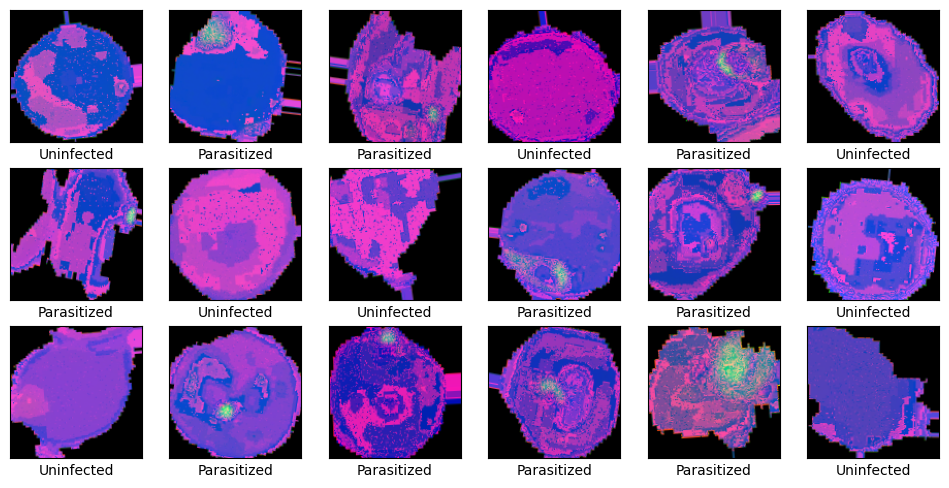

In [301]:
# Normalize the image data
X_train_hsv_aug = X_train_hsv_aug.astype('float32') / 255.0
X_test_hsv_aug = X_test_hsv_aug.astype('float32') / 255.0
# Get a batch of augmented images
augmented_images_train, augmented_labels_train = next(datagen.flow(X_train_hsv_aug, y_train, batch_size=18))
augmented_images_test, augmented_labels_test = next(datagen.flow(X_test_hsv_aug, y_test, batch_size=18))
# Define categories
categories = ['Uninfected', 'Parasitized']
# Plot augmented images for Train
print('Augumented images for Train')
plot_images(augmented_images_train, augmented_labels_train, categories, num_images=18)
# Plot augmented images for Test
print('Augumented images for test')
plot_images(augmented_images_test, augmented_labels_test, categories, num_images=18)

####<b>Observations and insights: ____</b>

> As per the images augumented, I don't see a vrery good reason to do, because the esence of the data is the same even if we flip th image or zoom it or rotate it. 

###<b>Building the Model

In [302]:
# Define the CNN architecture with enhanced regularization and dropout
model3 = Sequential([
    Input(shape=(X_train_hsv_aug.shape[1], X_train_hsv_aug.shape[2], X_train.shape[3])),
    Conv2D(32, (3, 3), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.1),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(64, (3, 3), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.1),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(128, (3, 3), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.1),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Flatten(),
    Dense(128, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(negative_slope=0.1),
    Dropout(0.5),
    
    Dense(2, activation='softmax')  # 2 classes: Uninfected and Parasitized
])

# Compile the model
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model3.summary()


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_69 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_36 (LeakyReLU)      │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_69 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_37 (LeakyReLU)      │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_70 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_38 (LeakyReLU)      │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_71 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_23 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_39 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,306 (12.61 MB)

 Trainable params: 3,305,602 (12.61 MB)

 Non-trainable params: 704 (2.75 KB)

<b>Using Callbacks

In [303]:
# Define callbacks
callbacks = [
    ModelCheckpoint(filepath='hsv_model__augumented_3.keras', monitor='val_loss', save_best_only=True),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    TensorBoard(log_dir=os.path.join("logs", "fit", "cnn_model"), histogram_freq=1)
]

<b> Fit and Train the model

In [305]:
# Train the model with data augmentation
history3 = model3.fit(datagen.flow(X_train_hsv_aug, y_train, batch_size=32),
                    epochs=20,
                    validation_data=(X_test_hsv_aug, y_test),
                    callbacks=callbacks)


Epoch 1/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 130s 166ms/step - accuracy: 0.7420 - loss: 0.9656 - val_accuracy: 0.9265 - val_loss: 0.4368
Epoch 2/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 129s 165ms/step - accuracy: 0.9261 - loss: 0.4392 - val_accuracy: 0.9315 - val_loss: 0.3495
Epoch 3/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 130s 167ms/step - accuracy: 0.9355 - loss: 0.3673 - val_accuracy: 0.9562 - val_loss: 0.3066
Epoch 4/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 131s 168ms/step - accuracy: 0.9430 - loss: 0.3461 - val_accuracy: 0.9504 - val_loss: 0.3065
Epoch 5/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 131s 167ms/step - accuracy: 0.9452 - loss: 0.3343 - val_accuracy: 0.8927 - val_loss: 0.4668
Epoch 6/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 129s 165ms/step - accuracy: 0.9486 - loss: 0.3441 - val_accuracy: 0.9715 - val_loss: 0.2776
Epoch 7/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 129s 165ms/step - accuracy: 0.9519 - loss: 0.3292 - val_accuracy: 0.9538 - val_loss: 0.2946
Epoch 8/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 128s 163ms/step - accuracy: 0.9515 -

###<B>Evaluating the model

In [306]:
# Evaluate the model on the test data
test_loss, test_acc = model3.evaluate(X_test_hsv_aug, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Save the final model
model3.save('hsv_malaria_cnn_model3_augumented.keras')

82/82 - 3s - 32ms/step - accuracy: 0.9715 - loss: 0.2776
Test accuracy: 0.9715384840965271


<b>Plot the train and validation accuracy

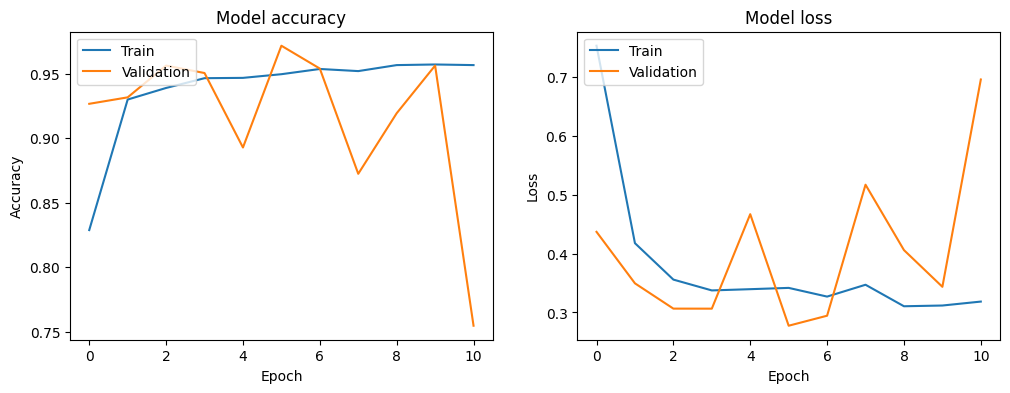

In [307]:
# Plot training and validation curves
plot_training_curves(history3)


<B>Plotting the classification report and confusion matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step


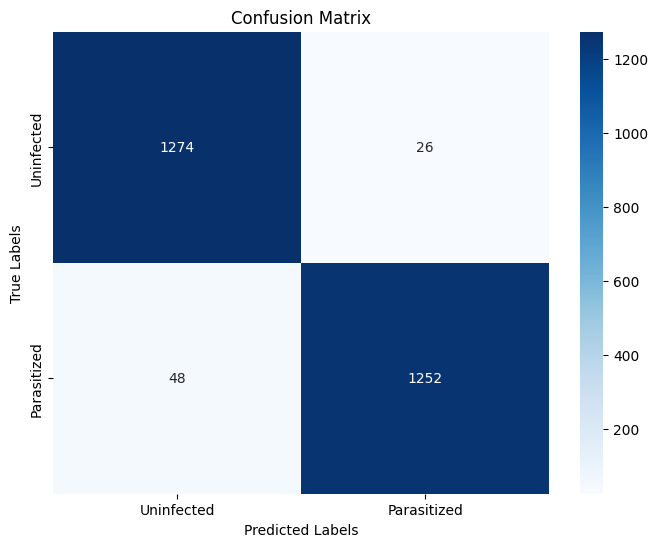

              precision    recall  f1-score   support

  Uninfected       0.96      0.98      0.97      1300
 Parasitized       0.98      0.96      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



In [308]:
# Generate predictions for the test data
y_pred_prob = model3.predict(X_test_hsv_aug)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=['Uninfected', 'Parasitized']))

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**
- Import VGG16 network upto any layer you choose
- Add Fully Connected Layers on top of it

Train dataset:


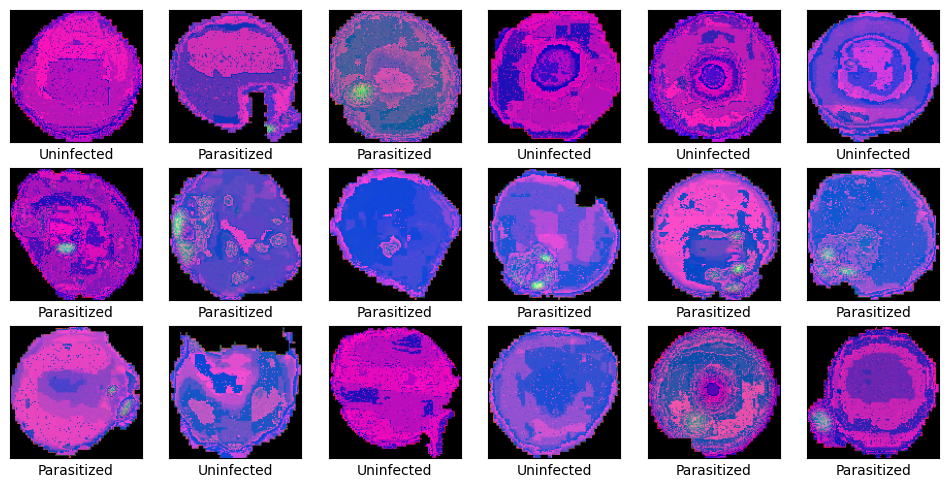

Test dataset:


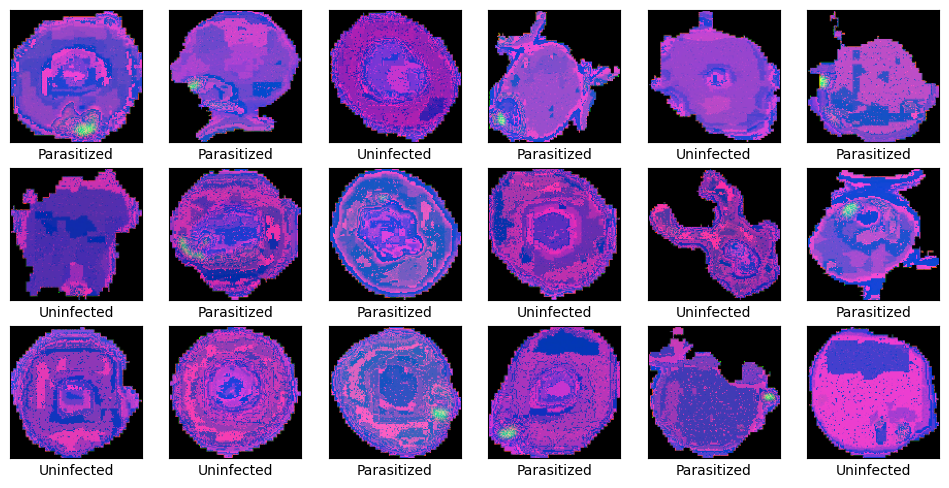

In [310]:
# Loading Libraries
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.model import Model

# I will still use hsv dataset since I use it to all of the model above. It will be a fair comparison at the end.
# Define the path to train dataset
X_train_vgg16 = X_train_hsv
X_test_vgg16 = X_test_hsv
# Load the VGG16 model, excluding the top fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))
# Plot HSV test images
print('Train dataset:')
plot_images(X_train_vgg16, y_train, categories, num_images = 18)
print('Test dataset:')
plot_images(X_test_vgg16, y_test, categories, num_images = 18)


In [311]:
# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

# Combine the base model and the custom layers
model4 = Model(inputs=base_model.input, outputs=predictions)


###<b>Compiling the model

In [312]:
# Compile the model
model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

<b> using callbacks

In [313]:
# Define callbacks
callbacks = [
    ModelCheckpoint(filepath='VGG16_pre_trained_model4.keras', monitor='val_loss', save_best_only=True),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    TensorBoard(log_dir=os.path.join("logs", "fit", "cnn_model"), histogram_freq=1)
]


<b>Fit and Train the model

In [314]:
# Train the model VGG16
history4 = model4.fit(datagen.flow(X_train_vgg16, y_train, batch_size=32),
                    epochs=20,
                    validation_data=(X_test_vgg16, y_test),
                    callbacks=callbacks)


Epoch 1/20


/Users/EcaterinaDraghiciu/Downloads/workspace VS/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


780/780 ━━━━━━━━━━━━━━━━━━━━ 473s 605ms/step - accuracy: 0.6773 - loss: 1.1955 - val_accuracy: 0.7869 - val_loss: 0.4495
Epoch 2/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 473s 605ms/step - accuracy: 0.7719 - loss: 0.4849 - val_accuracy: 0.7950 - val_loss: 0.4380
Epoch 3/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 478s 612ms/step - accuracy: 0.7833 - loss: 0.4594 - val_accuracy: 0.7977 - val_loss: 0.4332
Epoch 4/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 471s 604ms/step - accuracy: 0.7925 - loss: 0.4471 - val_accuracy: 0.8138 - val_loss: 0.4095
Epoch 5/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 469s 600ms/step - accuracy: 0.7948 - loss: 0.4497 - val_accuracy: 0.8031 - val_loss: 0.4107
Epoch 6/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 472s 604ms/step - accuracy: 0.7925 - loss: 0.4476 - val_accuracy: 0.8127 - val_loss: 0.4104
Epoch 7/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 472s 605ms/step - accuracy: 0.7970 - loss: 0.4421 - val_accuracy: 0.8108 - val_loss: 0.4071
Epoch 8/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 465s 596ms/step - accuracy: 0.8007 - loss: 0.43

<b>Plot the train and validation accuracy

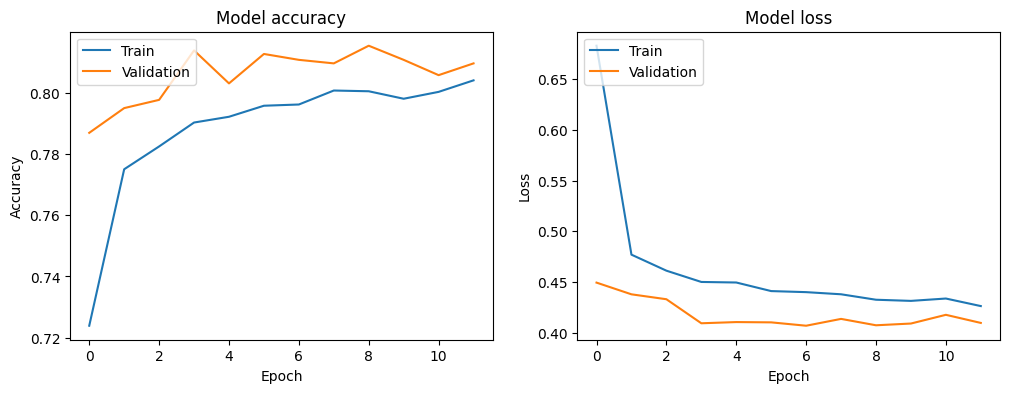

In [315]:
# Plot training and validation curves
plot_training_curves(history4)

###**Observations and insights: _____**

*   What can be observed from the validation and train curves?
> The validation accuracy is overfitting significantly. This indicates that the model's performance on the validation set is not stable.

> Both training and validation accuracies appear to converge towards the end, around the 10th epoch. But still not enouth for a stable model.

###<b> Evaluating the model

In [316]:

# Evaluate the model on the test data
test_loss, test_acc = model4.evaluate(X_test_vgg16, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Save the final model
model4.save('VGG16_malaria_cnn_pre_defined_model.keras')

82/82 - 45s - 551ms/step - accuracy: 0.8108 - loss: 0.4071
Test accuracy: 0.810769259929657


<b>Plotting the classification report and confusion matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 44s 541ms/step


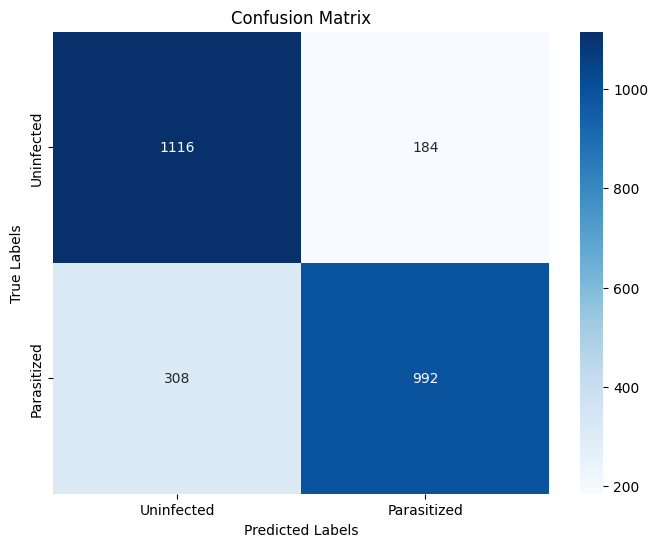

              precision    recall  f1-score   support

  Uninfected       0.78      0.86      0.82      1300
 Parasitized       0.84      0.76      0.80      1300

    accuracy                           0.81      2600
   macro avg       0.81      0.81      0.81      2600
weighted avg       0.81      0.81      0.81      2600



In [317]:
# Generate predictions for the test data
y_pred_prob = model4.predict(X_test_vgg16)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=['Uninfected', 'Parasitized']))

###<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?

> The model performs relatively well with a high number of true positives in both classes, but there is room for improvement in reducing false positives and false negatives.

> The model demonstrates good overall performance with an accuracy of 81%. Both classes have relatively balanced precision, recall, and F1-scores, indicating the model is effective at distinguishing between uninfected and parasitized cells. However, there is a slight room for improvement in identifying parasitized cells more accurately (increasing recall) and reducing false positives in uninfected cells (increasing precision). Further fine-tuning and experimentation with the model and data preprocessing techniques can help enhance these metrics.

*  Choose the model with the best accuracy scores from all the above model and save it as a final model.

The final model is already saved as <b>hvs_malaria_cnn_model_1_improved.keras</b>

####<b> Observations and Conclusions drawn from the final model: _____



**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained model or different CNN architecture?
*  You can try to build a model using these HSV images and compare them with your other model.

> Having utilized the HSV dataset images for model development, I will select the best performing model architecture, which is the <b>CNN architecture with regularization and increased dropout (hvs_malaria_cnn_model_1_improved.keras)</b>. 

> I plan to create a similar model, <b>edges_malaria_cnn_model.keras</b>, using Edge Detection for training and testing.

> My objective is to optimize the ML model. The goal is to reduce processing memory requirements due to the simplified images while maintaining or potentially improving the model's performance.

Train images:


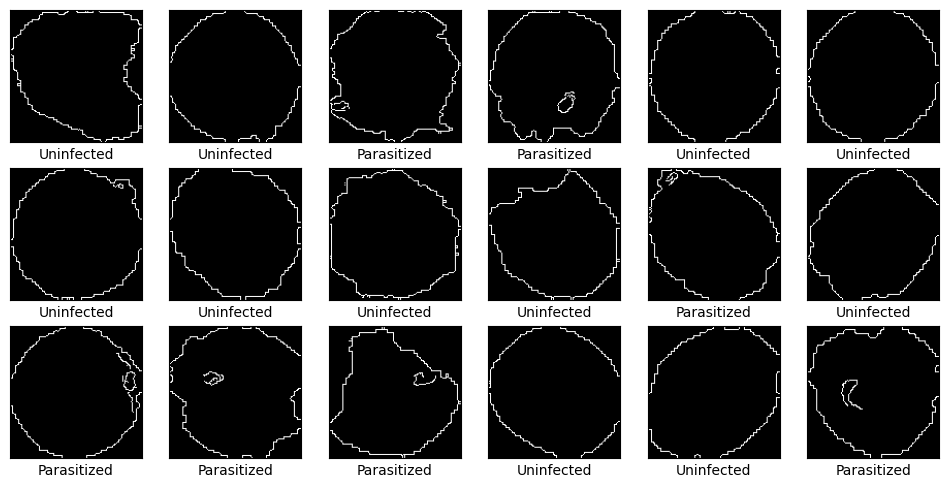

Test images:


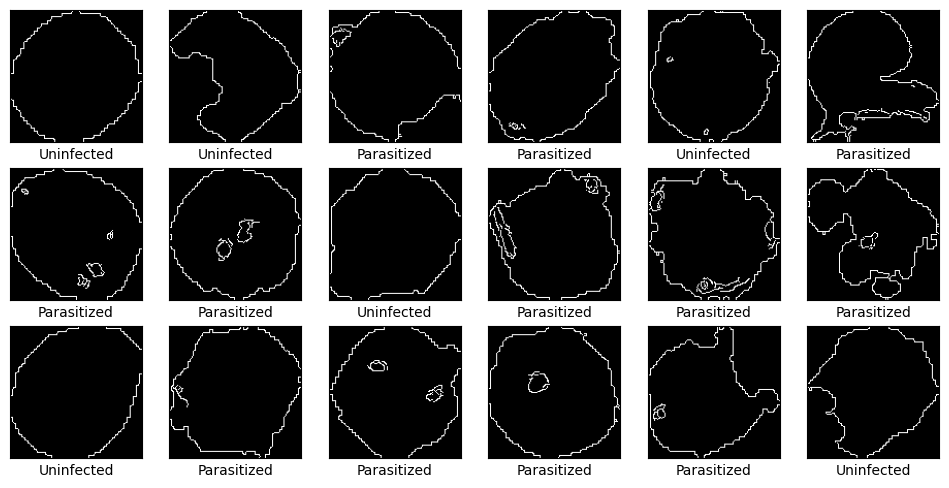

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_75 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_75 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_76 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_77 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_25 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [319]:
# Apply Canny edge detection to the training and test images
X_train_edges = apply_canny_edge(X_train)
X_test_edges = apply_canny_edge(X_test) 
# Normalize the image data
X_train_edges = X_train_edges.astype('float32') / 255.0
X_test_edges = X_test_edges.astype('float32') / 255.0
# Plot edge-detected images
print('Train images:')
plot_images(X_train_edges, y_train, categories, num_images=18)
print('Test images:')
plot_images(X_test_edges, y_test, categories, num_images=18)


# Define the CNN architecture with regularization and increased dropout on edge detection dataset.
model6 = Sequential([
    Input(shape=(X_train_edges.shape[1], X_train_edges.shape[2], X_train_edges.shape[3])),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 classes: Uninfected and Parasitized
])

# Compile the model
model6.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model6.summary()

# Define callbacks
callbacks = [
    ModelCheckpoint(filepath='hsv_model_1.keras', monitor='val_loss', save_best_only=True),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    TensorBoard(log_dir=os.path.join("logs", "fit", "cnn_model"), histogram_freq=1)
]

In [320]:
# Train the model
history6 = model6.fit(X_train_edges, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test_edges, y_test),
                    callbacks=callbacks)

Epoch 1/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 78s 99ms/step - accuracy: 0.7709 - loss: 0.6255 - val_accuracy: 0.9015 - val_loss: 0.3688
Epoch 2/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 78s 99ms/step - accuracy: 0.9027 - loss: 0.3640 - val_accuracy: 0.9173 - val_loss: 0.3221
Epoch 3/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 76s 98ms/step - accuracy: 0.9129 - loss: 0.3304 - val_accuracy: 0.9088 - val_loss: 0.3246
Epoch 4/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 78s 99ms/step - accuracy: 0.9129 - loss: 0.3224 - val_accuracy: 0.9235 - val_loss: 0.2920
Epoch 5/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 0.9169 - loss: 0.3131 - val_accuracy: 0.9250 - val_loss: 0.2942
Epoch 6/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 76s 98ms/step - accuracy: 0.9203 - loss: 0.3007 - val_accuracy: 0.9242 - val_loss: 0.2907
Epoch 7/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.9230 - loss: 0.2893 - val_accuracy: 0.9300 - val_loss: 0.2811
Epoch 8/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 78s 101ms/step - accuracy: 0.9244 - loss: 0.2889 

In [321]:
# Evaluate the model on the test data
test_loss, test_acc = model6.evaluate(X_test_edges, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Save the final model
model6.save('edges_malaria_cnn_model.keras')


82/82 - 2s - 29ms/step - accuracy: 0.9327 - loss: 0.2636
Test accuracy: 0.932692289352417


82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


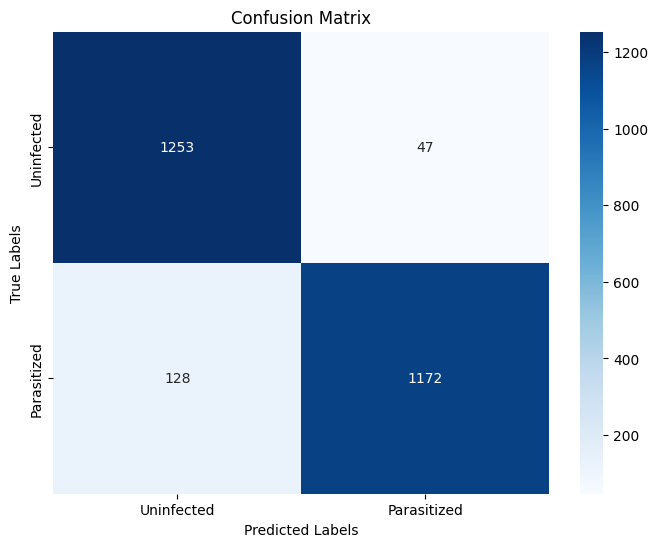

              precision    recall  f1-score   support

  Uninfected       0.91      0.96      0.93      1300
 Parasitized       0.96      0.90      0.93      1300

    accuracy                           0.93      2600
   macro avg       0.93      0.93      0.93      2600
weighted avg       0.93      0.93      0.93      2600



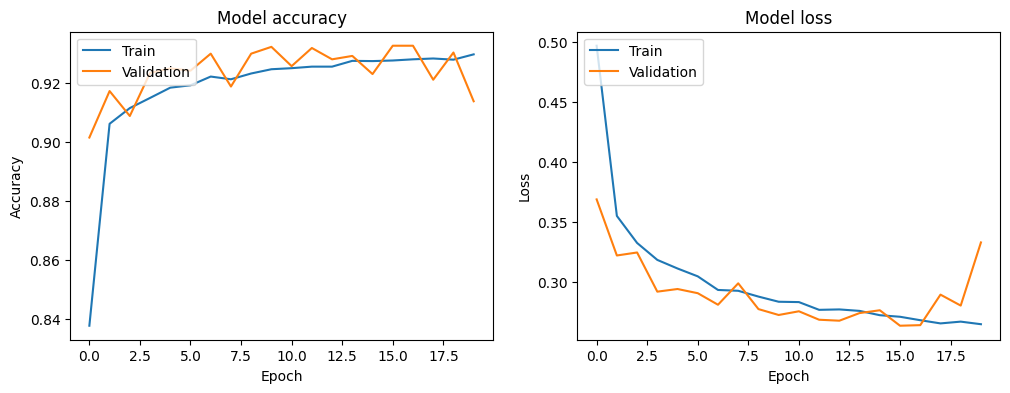

In [322]:

# Generate predictions for the test data
y_pred_prob = model6.predict(X_test_edges)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=['Uninfected', 'Parasitized']))

# Plot training and validation curves
plot_training_curves(history6)

<b>Observation after Edge Detection</b>

> The results of the Edge Detection model architecture is fluctuating. This indicates that the model's performance on the validation set is not stable and is experiencing some degree of variability.

> Next i will procede with modification of the model's architecture, adding more convolutional layers, increasing the number of filters, add LeakyReLU as activation point and Batch Normalization to help stabilize and improve the training process.

In [324]:
# Define the CNN architecture with Batch Normalization and LeakyReLU
model6_improved = Sequential([
    Input(shape=(X_train_edges.shape[1], X_train_edges.shape[2], X_train_edges.shape[3])),
    Conv2D(32, (3, 3), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(),
    Dropout(0.5),
    
    Dense(2, activation='softmax')
])


In [325]:
# Compile the model
model6_improved.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model6_improved.summary()

# Define callbacks
callbacks = [
    ModelCheckpoint(filepath='hsv_model_1.keras', monitor='val_loss', save_best_only=True),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    TensorBoard(log_dir=os.path.join("logs", "fit", "cnn_model"), histogram_freq=1)
]

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_82 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_45 (LeakyReLU)      │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_82 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_46 (LeakyReLU)      │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_83 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_84 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_47 (LeakyReLU)      │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_84 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_85 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_48 (LeakyReLU)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_85 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_27 (Flatten)            │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_49 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 1,570,882 (5.99 MB)

 Trainable params: 1,569,666 (5.99 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [326]:
# Train the model
history6_improved = model6_improved.fit(X_train_edges, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test_edges, y_test),
                    callbacks=callbacks)

Epoch 1/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 128s 162ms/step - accuracy: 0.8499 - loss: 0.8395 - val_accuracy: 0.8900 - val_loss: 0.4805
Epoch 2/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 131s 168ms/step - accuracy: 0.9043 - loss: 0.4000 - val_accuracy: 0.8481 - val_loss: 0.4817
Epoch 3/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 126s 161ms/step - accuracy: 0.9063 - loss: 0.3593 - val_accuracy: 0.8488 - val_loss: 0.4376
Epoch 4/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 126s 161ms/step - accuracy: 0.9164 - loss: 0.3381 - val_accuracy: 0.5004 - val_loss: 1.2170
Epoch 5/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 127s 162ms/step - accuracy: 0.9140 - loss: 0.3354 - val_accuracy: 0.5569 - val_loss: 1.4155
Epoch 6/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 126s 162ms/step - accuracy: 0.9169 - loss: 0.3387 - val_accuracy: 0.9154 - val_loss: 0.3306
Epoch 7/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 126s 161ms/step - accuracy: 0.9204 - loss: 0.3275 - val_accuracy: 0.7262 - val_loss: 0.6989
Epoch 8/20
780/780 ━━━━━━━━━━━━━━━━━━━━ 126s 162ms/step - accuracy: 0.9156 -

In [327]:
# Evaluate the model on the test data
test_loss, test_acc = model6_improved.evaluate(X_test_edges, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Save the final model
model6_improved.save('edges_malaria_cnn_model_improved.keras')


82/82 - 3s - 35ms/step - accuracy: 0.9400 - loss: 0.2582
Test accuracy: 0.9399999976158142


82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step


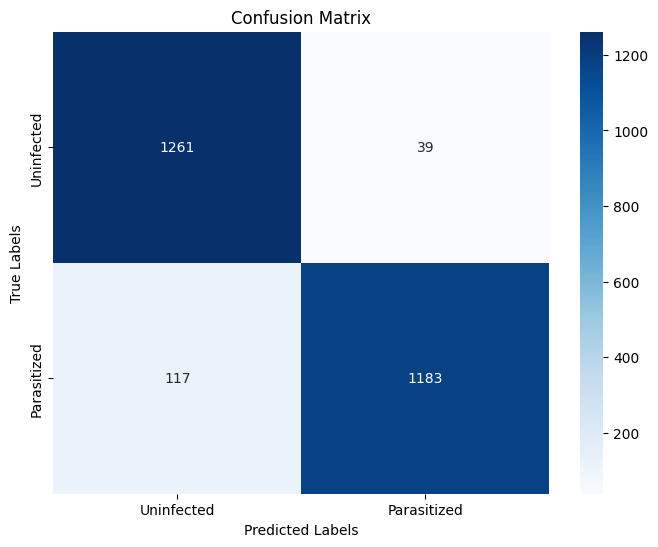

              precision    recall  f1-score   support

  Uninfected       0.92      0.97      0.94      1300
 Parasitized       0.97      0.91      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



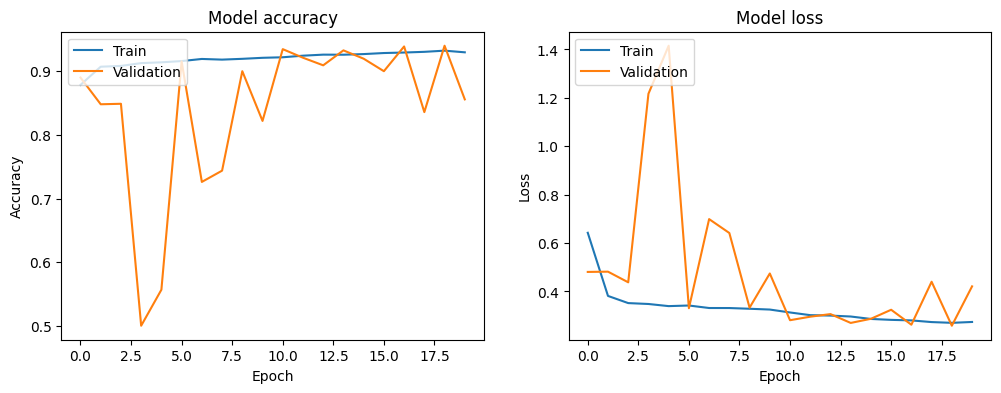

In [328]:
# Generate predictions for the test data
y_pred_prob = model6_improved.predict(X_test_edges)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=['Uninfected', 'Parasitized']))

# Plot training and validation curves
plot_training_curves(history6_improved)

<b>Observation after Edge improvement</b>

<b>Comparison of Model Results</b>

<b>Previous Results:</b>

- **Uninfected**:
  - Precision: 0.91
  - Recall: 0.96
  - F1-Score: 0.93
  - Support: 1300

- **Parasitized**:
  - Precision: 0.96
  - Recall: 0.90
  - F1-Score: 0.93
  - Support: 1300

- **Overall**:
  - Accuracy: 0.93
  - Macro Avg Precision: 0.93
  - Macro Avg Recall: 0.93
  - Macro Avg F1-Score: 0.93
  - Weighted Avg Precision: 0.93
  - Weighted Avg Recall: 0.93
  - Weighted Avg F1-Score: 0.93

<b>Current Results:</b>

- **Uninfected**:
  - Precision: 0.92
  - Recall: 0.97
  - F1-Score: 0.94
  - Support: 1300

- **Parasitized**:
  - Precision: 0.97
  - Recall: 0.91
  - F1-Score: 0.94
  - Support: 1300

- **Overall**:
  - Accuracy: 0.94
  - Macro Avg Precision: 0.94
  - Macro Avg Recall: 0.94
  - Macro Avg F1-Score: 0.94
  - Weighted Avg Precision: 0.94
  - Weighted Avg Recall: 0.94
  - Weighted Avg F1-Score: 0.94

<b>Analysis of Results</b>

1. **Accuracy**:
   - The overall accuracy has improved from 93% to 94%.

2. **Precision**:
   - For Uninfected cells, the precision has increased from 0.91 to 0.92.
   - For Parasitized cells, the precision has increased from 0.96 to 0.97.

3. **Recall**:
   - For Uninfected cells, the recall has increased from 0.96 to 0.97.
   - For Parasitized cells, the recall has improved slightly from 0.90 to 0.91.

4. **F1-Score**:
   - The F1-Score for Uninfected cells has increased from 0.93 to 0.94.
   - The F1-Score for Parasitized cells has also increased from 0.93 to 0.94.

5. **Macro Average and Weighted Average**:
   - Both Macro Avg and Weighted Avg precision, recall, and F1-scores have improved from 0.93 to 0.94.

<b> Conclusion </b>

The current Edge model demonstrates an improvement over the previous model across almost all metrics. The precision, recall, and F1-scores for both classes have increased, indicating better performance in distinguishing between parasitized and uninfected cells. The overall accuracy has also improved from 93% to 94%.

These improvements suggest that the changes made to the model architecture and training process were effective in enhancing its performance. The confusion matrix also supports this conclusion, showing fewer misclassifications in both categories compared to the previous results. The consistent high values across all metrics indicate that the model is well-balanced and performs reliably on the test dataset.

#### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?
> Working on this problem highlighted the impressive accuracy that a well-constructed ML model can achieve. Leveraging advanced image processing and analysis techniques allows us to determine whether a cell is infected. The crucial steps involve first visualizing the images and then applying various transformation methods such as Augmentation, Edge Detection, Normalization, and HSV conversion.


####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?
> Experimenting with different techniques is essential, though not all methods prove useful. For instance, Gaussian Blurring did not enhance the performance for this specific use case. Upon visualizing the HSV transformation, it became evident that this approach should be integrated into further model architectures due to its clear distinction of infected cells through a green hue. 
> After refinment of Edge Detection I can say that there isn't a big difference compared with HSV (hvs_malaria_cnn_model_1_improved.keras) which is the best performed so far.

> With that being said here is a comparison of the two best modesl for this use case:

### Pros and Cons of Using Edge Detection vs HSV for Detecting Infected Cells

#### Edge Detection Model

**Pros**:
1. **Highlighting Boundaries**:
   - **Pros**: Edge detection emphasizes the boundaries and edges in an image, which can be useful in highlighting the structure of cells and identifying features that differentiate parasitized cells from uninfected ones.
   - **Cons**: It might miss internal cell structures that are critical for accurate classification.

2. **Reduced Complexity**:
   - **Pros**: Edge-detected images often have lower complexity and reduced detail, potentially making it easier for the model to focus on the most important features and leading to faster training times.
   - **Cons**: The simplification might result in the loss of important texture and color information that could be crucial for accurate detection.

3. **Noise Reduction**:
   - **Pros**: Edge detection can help in reducing noise in the image, making it easier for the model to learn relevant features.
   - **Cons**: Overly aggressive edge detection might also eliminate useful details.

4. **Model Training Efficiency**:
   - **Pros**: model trained on edge-detected images might require fewer resources and less time due to the simplified nature of the input data.
   - **Cons**: This simplicity might lead to lower accuracy if the edges do not capture all necessary information for classification.

**Cons**:
1. **Loss of Detail**:
   - Edge detection reduces the image to its edges, which might cause the model to miss important texture and color information that can be critical for distinguishing between infected and uninfected cells.

2. **Dependence on Quality of Edge Detection**:
   - The effectiveness of the model depends heavily on the quality of the edge detection algorithm used. Poor edge detection can lead to loss of critical features.

#### HSV Model

**Pros**:
1. **Color Information**:
   - **Pros**: HSV (Hue, Saturation, Value) color space provides a better representation of colors compared to RGB. It separates the chromatic content (hue) from the intensity (value), which can be useful in distinguishing parasitized cells that might have different color properties compared to uninfected cells.
   - **Cons**: The model might become overly reliant on color information, which could be affected by variations in staining or imaging conditions.

2. **Enhanced Feature Extraction**:
   - **Pros**: The HSV model can leverage differences in color and brightness to detect subtle variations in cells, potentially leading to higher accuracy in classification.
   - **Cons**: Processing and training might be more computationally intensive compared to edge detection due to the increased complexity of the data.

3. **Robustness to Lighting Conditions**:
   - **Pros**: HSV is more robust to changes in lighting conditions, as hue remains relatively constant under different lighting, making the model more stable and reliable.
   - **Cons**: Variations in hue due to staining or imaging artifacts can still impact performance.

4. **Detailed Information**:
   - **Pros**: Retains more detailed information about the cell structures, which might be critical for accurately identifying infected cells.
   - **Cons**: This additional detail can also mean more complex model and longer training times.

**Cons**:
1. **Higher Computational Load**:
   - Training on HSV images can be more computationally intensive due to the complexity of the data.

2. **Potential Overfitting**:
   - The model might overfit to the color and brightness variations in the training set, which may not generalize well to new data.

### Summary

**Edge Detection Model**:
- **Pros**: Emphasizes structure, reduced complexity, noise reduction, efficient training.
- **Cons**: Loss of detail, dependence on edge detection quality.

**HSV Model**:
- **Pros**: Utilizes color information, enhanced feature extraction, robustness to lighting, detailed information.
- **Cons**: Higher computational load, potential overfitting.

### Conclusion

To determine the best approach, I will comparing side by side the performance of both model on metrics such as accuracy, precision, recall, F1-score, and computational efficiency. This empirical evaluation will provide a clearer picture of which method is more suitable for malaria detection.


82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step
Classification report for HSV model:

              precision    recall  f1-score   support

  Uninfected       0.98      0.99      0.98      1300
 Parasitized       0.99      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600

Classification report for Edge Detection model:

              precision    recall  f1-score   support

  Uninfected       0.92      0.97      0.94      1300
 Parasitized       0.97      0.91      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600

Vraining and validation curves on HSV model:



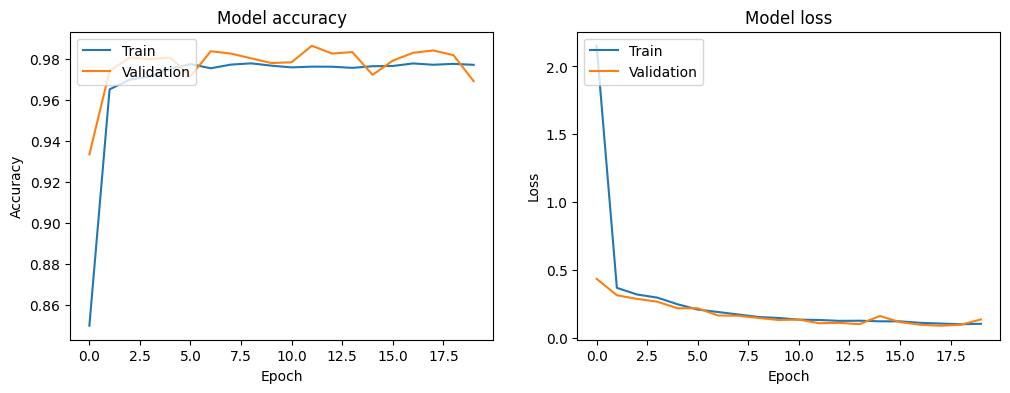

Vraining and validation curves on Edge Detection model:



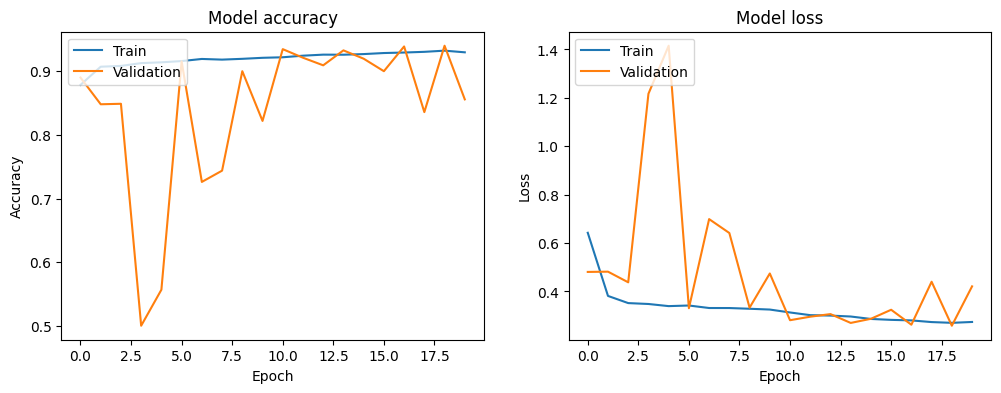

In [333]:
# Generate predictions for the test data HSV model
y_pred_prob_hsv = model1_improved.predict(X_test_hsv)
y_pred_hsv = np.argmax(y_pred_prob_hsv, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate predictions for the test data Edge model
y_pred_prob_edge = model6_improved.predict(X_test_edges)
y_pred_edge = np.argmax(y_pred_prob_edge, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print classification report
print('Classification report for HSV model:\n')
print(classification_report(y_true, y_pred_hsv, target_names=['Uninfected', 'Parasitized']))
###
print('Classification report for Edge Detection model:\n')
print(classification_report(y_true, y_pred_edge, target_names=['Uninfected', 'Parasitized']))


# Plot training and validation
print('Vraining and validation curves on HSV model:\n')
plot_training_curves(history_model1_improved)
###
print('Vraining and validation curves on Edge Detection model:\n')
plot_training_curves(history6_improved)


### What are the most important findings the analysis done in Milestone - Provide the final proposed model specifications
#### Proposal for the final solution design:
- What model do you propose to be adopted? Why is this the best solution to adopt?

The model that it should be adopted is <b>CNN architecture with regularization and increased dropout hvs_malaria_cnn_model_1_improved.keras</b>
Comparing the two model side by side is clear that HSV model is better suited for this use case.

#### Model Accuracy Plot
The accuracy plot shows the performance of the chosen model:

1. **Training Accuracy**:
   - The training accuracy rapidly increases and stabilizes around 0.98, indicating that the model quickly learns the training data.

2. **Validation Accuracy**:
   - The validation accuracy closely follows the training accuracy, fluctuating slightly around the 0.98 mark, indicating good generalization and minimal overfitting.

### Classification Report
The classification report provides detailed performance metrics:

1. **Class-Specific Metrics**:
   - **Uninfected**:
     - Precision: 0.98
     - Recall: 0.99
     - F1-Score: 0.98
     - Support: 1300
   - **Parasitized**:
     - Precision: 0.99
     - Recall: 0.98
     - F1-Score: 0.98
     - Support: 1300

2. **Overall Metrics**:
   - **Accuracy**: 0.98
   - **Macro Average**:
     - Precision: 0.98
     - Recall: 0.98
     - F1-Score: 0.98
   - **Weighted Average**:
     - Precision: 0.98
     - Recall: 0.98
     - F1-Score: 0.98

### Interpretation

1. **High Accuracy**:
   - The model achieves an overall accuracy of 98%, which is excellent and indicates that the model is highly effective at distinguishing between parasitized and uninfected cells.

2. **Balanced Performance**:
   - The precision, recall, and F1-scores for both classes are very high and close to each other (0.98 and 0.99). This indicates that the model performs equally well for both classes without any significant bias towards one class.

3. **High Recall for Uninfected Cells**:
   - The recall for uninfected cells is slightly higher (0.99) compared to parasitized cells (0.98). This means the model is very good at correctly identifying uninfected cells.

4. **High Precision for Parasitized Cells**:
   - The precision for parasitized cells is slightly higher (0.99) compared to uninfected cells (0.98). This indicates the model is very good at correctly predicting parasitized cells without many false positives.

5. **Consistency**:
   - The close alignment between training and validation accuracy curves suggests that the model is well-regularized and does not suffer from overfitting.

### Conclusion

The model demonstrates excellent performance with high accuracy, precision, recall, and F1-scores across both classes. The training and validation accuracy curves indicate good generalization to new data. These results suggest that the model is reliable and effective for the task of detecting parasitized and uninfected cells in malaria diagnosis.

### Recommendations

1. **Deployment**:
   - Given the high performance metrics, the model is suitable for deployment in a real-world setting for automated malaria diagnosis.

2. **Continuous Monitoring**:
   - Continuously monitor the model’s performance on new data to ensure it maintains its high accuracy and generalization capabilities.

3. **Further Validation**:
   - Validate the model on additional independent datasets to confirm its robustness and reliability across diverse conditions and populations.

### Summary of the problem - Explain the reason for the proposed solution design - How it would affect the problem/business?

> I choose this solution because when it comes to medical issues, people and deseases, is better to choose the most fitted model possible to minimize the posibility of wrong interpretation. 

> What I look for in a model for malaria detection is minimum of False Negative Parasitized misclassified as Uninfected. This is crucial for the business because that can lead to malpraxis if neglected.

### What are some key recommendations to implement the solutions? 

> Regularly run the model on additional datasets to ensure ongoing reliability and robustness. This practice will help maintain the model’s accuracy and stability over time, enhancing its value and trustworthiness.

### What are the key actionables for stakeholders? 

> Malaria detection by doctors typically involves various methods, from clinical assessments to laboratory tests. Integrating a machine learning (ML) model that can interpret these results offers an additional technique with high accuracy, reaching up to 98% for the model chosen. This integration is especially valuable for bulk interpretation, streamlining the diagnostic process and improving efficiency.

### What is the expected benefit and/or costs? 

> Each malaria detection technique has its strengths and limitations. Microscopy, when performed by skilled technicians, offers high sensitivity and specificity but requires significant expertise and infrastructure. RDTs provide a more accessible and rapid option, with good but slightly lower accuracy compared to microscopy and PCR. PCR offers the highest accuracy but is often impractical for routine use due to its cost and the need for specialized equipment and trained personnel.

> When choosing a diagnostic method, healthcare providers often balance the need for accuracy with the available resources, considering factors such as cost, time, and the technical capabilities of the healthcare setting. Implemanting this model can save time and resources that will reduce the overal cost of Malaria Detection tests.

> Further here are some benefits that can change the how Malaria is detected:

1. Improved Diagnostic Accuracy

Enhanced Detection: ML model can be trained to detect subtle patterns in blood smear images that may be missed by human eyes, potentially leading to more accurate diagnosis.
Consistency: Unlike human diagnosticians who may experience fatigue or variability in performance, ML model can provide consistent results.

2. Speed and Efficiency

Rapid Analysis: ML model can analyze blood smear images much faster than manual examination, reducing the time needed for diagnosis.
High Throughput: The ability to process large numbers of samples quickly can be particularly beneficial in outbreak situations or in high-volume testing centers.

3. Accessibility

Remote Areas: ML-based diagnostic tools can be deployed in remote or resource-limited areas where skilled microscopists are not available, improving access to malaria diagnosis.
Point-of-Care Testing: Integration of ML model with mobile devices or portable scanners can enable point-of-care testing, bringing diagnostic capabilities directly to patients.

4. Cost-Effectiveness

Reduced Labor Costs: Automation of the diagnostic process can reduce the need for highly skilled labor, potentially lowering overall healthcare costs.
Scalability: Once developed and deployed, ML model can scale easily to handle increasing numbers of samples without proportional increases in cost.

5. Early Detection and Treatment

Timely Diagnosis: Faster and more accurate diagnosis enables earlier initiation of treatment, which is crucial for improving patient outcomes and reducing malaria-related mortality.
Monitoring and Surveillance: ML model can aid in ongoing monitoring and surveillance efforts, helping to identify and respond to malaria outbreaks more effectively.

6. Augmentation of Human Expertise

Decision Support: ML model can serve as decision support tools for clinicians, providing a second opinion and reducing the cognitive load on healthcare providers.
Training Tool: ML-generated results can be used as training aids for new microscopists, helping them to learn and improve their diagnostic skills.

7. Data-Driven Insights

Pattern Recognition: ML model can analyze large datasets to uncover trends and patterns in malaria incidence, transmission, and response to treatment.
Research and Development: Insights gained from ML analysis can drive research and development efforts, leading to better diagnostic tools and treatment strategies.

8. Adaptability

Continuous Learning: ML model can be continuously updated and retrained with new data, allowing them to adapt to emerging malaria strains and changing epidemiological patterns.
Customizability: ML model can be tailored to specific regions or populations, improving their relevance and effectiveness in different settings.


> The implementation of machine learning model for malaria detection offers numerous benefits that can transform the way malaria is diagnosed and managed. These benefits include improved diagnostic accuracy, speed, and efficiency, increased accessibility, cost-effectiveness, timely detection and treatment, augmentation of human expertise, data-driven insights, and adaptability. By leveraging these advantages, ML model can play a crucial role in enhancing malaria control and ultimately reducing the global burden of this life-threatening disease.

### What are the key risks and challenges? 

1. Accuracy and Reliability

False Positives: The ML model may incorrectly classify uninfected cells as parasitized, leading to unnecessary treatments and potential side effects.
False Negatives: The ML model may fail to identify parasitized cells, resulting in missed diagnoses and delayed treatment, which can be life-threatening.

2. Data Quality and Bias

Data Quality: Poor quality or biased training data can lead to inaccurate predictions. If the training data is not representative of the patient population, the model may perform poorly in real-world scenarios.
Class Imbalance: Imbalanced datasets with disproportionate numbers of parasitized vs. uninfected cells can lead to biased predictions.

3. Interpretability and Transparency

ML model, especially deep learning model, can be difficult to interpret, making it hard for clinicians to understand how decisions are made.
Lack of Trust: Clinicians may be reluctant to trust or adopt ML model if they cannot understand the reasoning behind the predictions.

4. Scalability and Maintenance

Scalability: Ensuring that the ML model can handle a large number of cases in real-time without performance degradation.
Maintenance: Regularly updating the model to maintain accuracy and relevance as new data becomes available and malaria strains evolve.

>Implementing an ML model for malaria detection can offer significant benefits in terms of accuracy, efficiency, and accessibility. However, careful consideration of the associated risks and proactive measures to mitigate them are crucial for ensuring the safe and effective use of the technology in clinical settings. By addressing these risks through robust validation, transparent development practices, and continuous monitoring, healthcare providers can enhance the reliability and acceptance of ML-based malaria detection tools.

### What further analysis needs to be done or what other associated problems need to be solved?

> I highly recomend the following:

- Validation and Testing: Conduct extensive validation and testing on diverse datasets to ensure high accuracy and reliability.
- Threshold Tuning: Optimize the decision threshold to balance sensitivity and specificity according to clinical needs.
- Continuous Monitoring: Implement ongoing performance monitoring and regular updates to the model as new data becomes available.
- Bias Detection: Implement methods to detect and correct biases in the training data.
- Visualization Tools: Develop visualization tools to help clinicians interpret the model’s decisions.
- Transparency: Clearly document the model development process, including data sources, training procedures, and limitations.
- Scalable Infrastructure: Use scalable infrastructure and cloud-based solutions to handle large volumes of data and predictions.
- Regular Updates: Implement a process for regularly updating the model and retraining it with new data.